In [146]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# Data Mining & Exploration

## Data Cleaning

In [147]:
# Loading the CSV with pandas
data = pd.read_csv('/home/angshumanmandal/Angshuman/RUNS FOR GENETIC ALGO/Telco-customer-churn.csv')
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

#### Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc.

In [148]:
data.info()  # column details with the non null data and the dtype for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [149]:
#Removing customer IDs from the dataset. Because the the column will not be used in the predictive model.
df = data.drop("customerID", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### The dataset has a lot of categorical variables rendered as text values (‘Yes’,’No’,etc.) in the columns. Converting the categorical values into numeric values to facilitate ML algorithms to process the data.
#### Also, converting Total Charges to a numerical data type would be essential.

In [150]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### From the above output, it can be seen that, there are 11 missing values for Total Charges.We need to replace 11 rows from the data set. 
#### Also, the  predictor variable here is Churn that tells us whether the customer has churned or not. Therefore, it is necessary to convert the predictor variable in binary numeric variable.

In [151]:
df.dropna(inplace = True)   # This is being done to drom the rows with na values if you want to drom columns with na values then use axis=1

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)   #thus 1 means that the customer has churned 
df['Churn'].replace(to_replace='No',  value=0, inplace=True)   #and 0 means the customer has survived and stays with the company

# converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0              1   
1              0      34           56.95       1889.50      0              0   
2              0       2           53.85        108.15      1              0   
3              0      45           42.30       1840.75      0              0   
4              0       2           70.70        151.65      1              1   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0            0           0            1              1  ...   
1            1           1            0              1  ...   
2            1           1            0              1  ...   
3            1           1            0              1  ...   
4            0           1            0              1  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0                        0                  1   
2                    0                        1                  0   
3                    0                        0                  1   
4                    0                        1                  0   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0                  0                    0                     1   
1                  0                    1                     0   
2                  0                    0                     1   
3                  0                    1                     0   
4                  0                    0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 46 columns]

In [152]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

## Correlations between customer data features and customer churn
#### When building a predictive churn model, it is essential to understand which customer features have a significant correlation with churn. Correlation refers to the statistical relationship between two variables, indicating how changes in one variable might be associated with changes in another.By examining the correlation between churn and each customer feature, we can determine which features are most influential in predicting churn. These insights are crucial for feature selection, as including irrelevant or weakly correlated features in the predictive model may lead to overfitting, reduced model performance, and increased complexity.

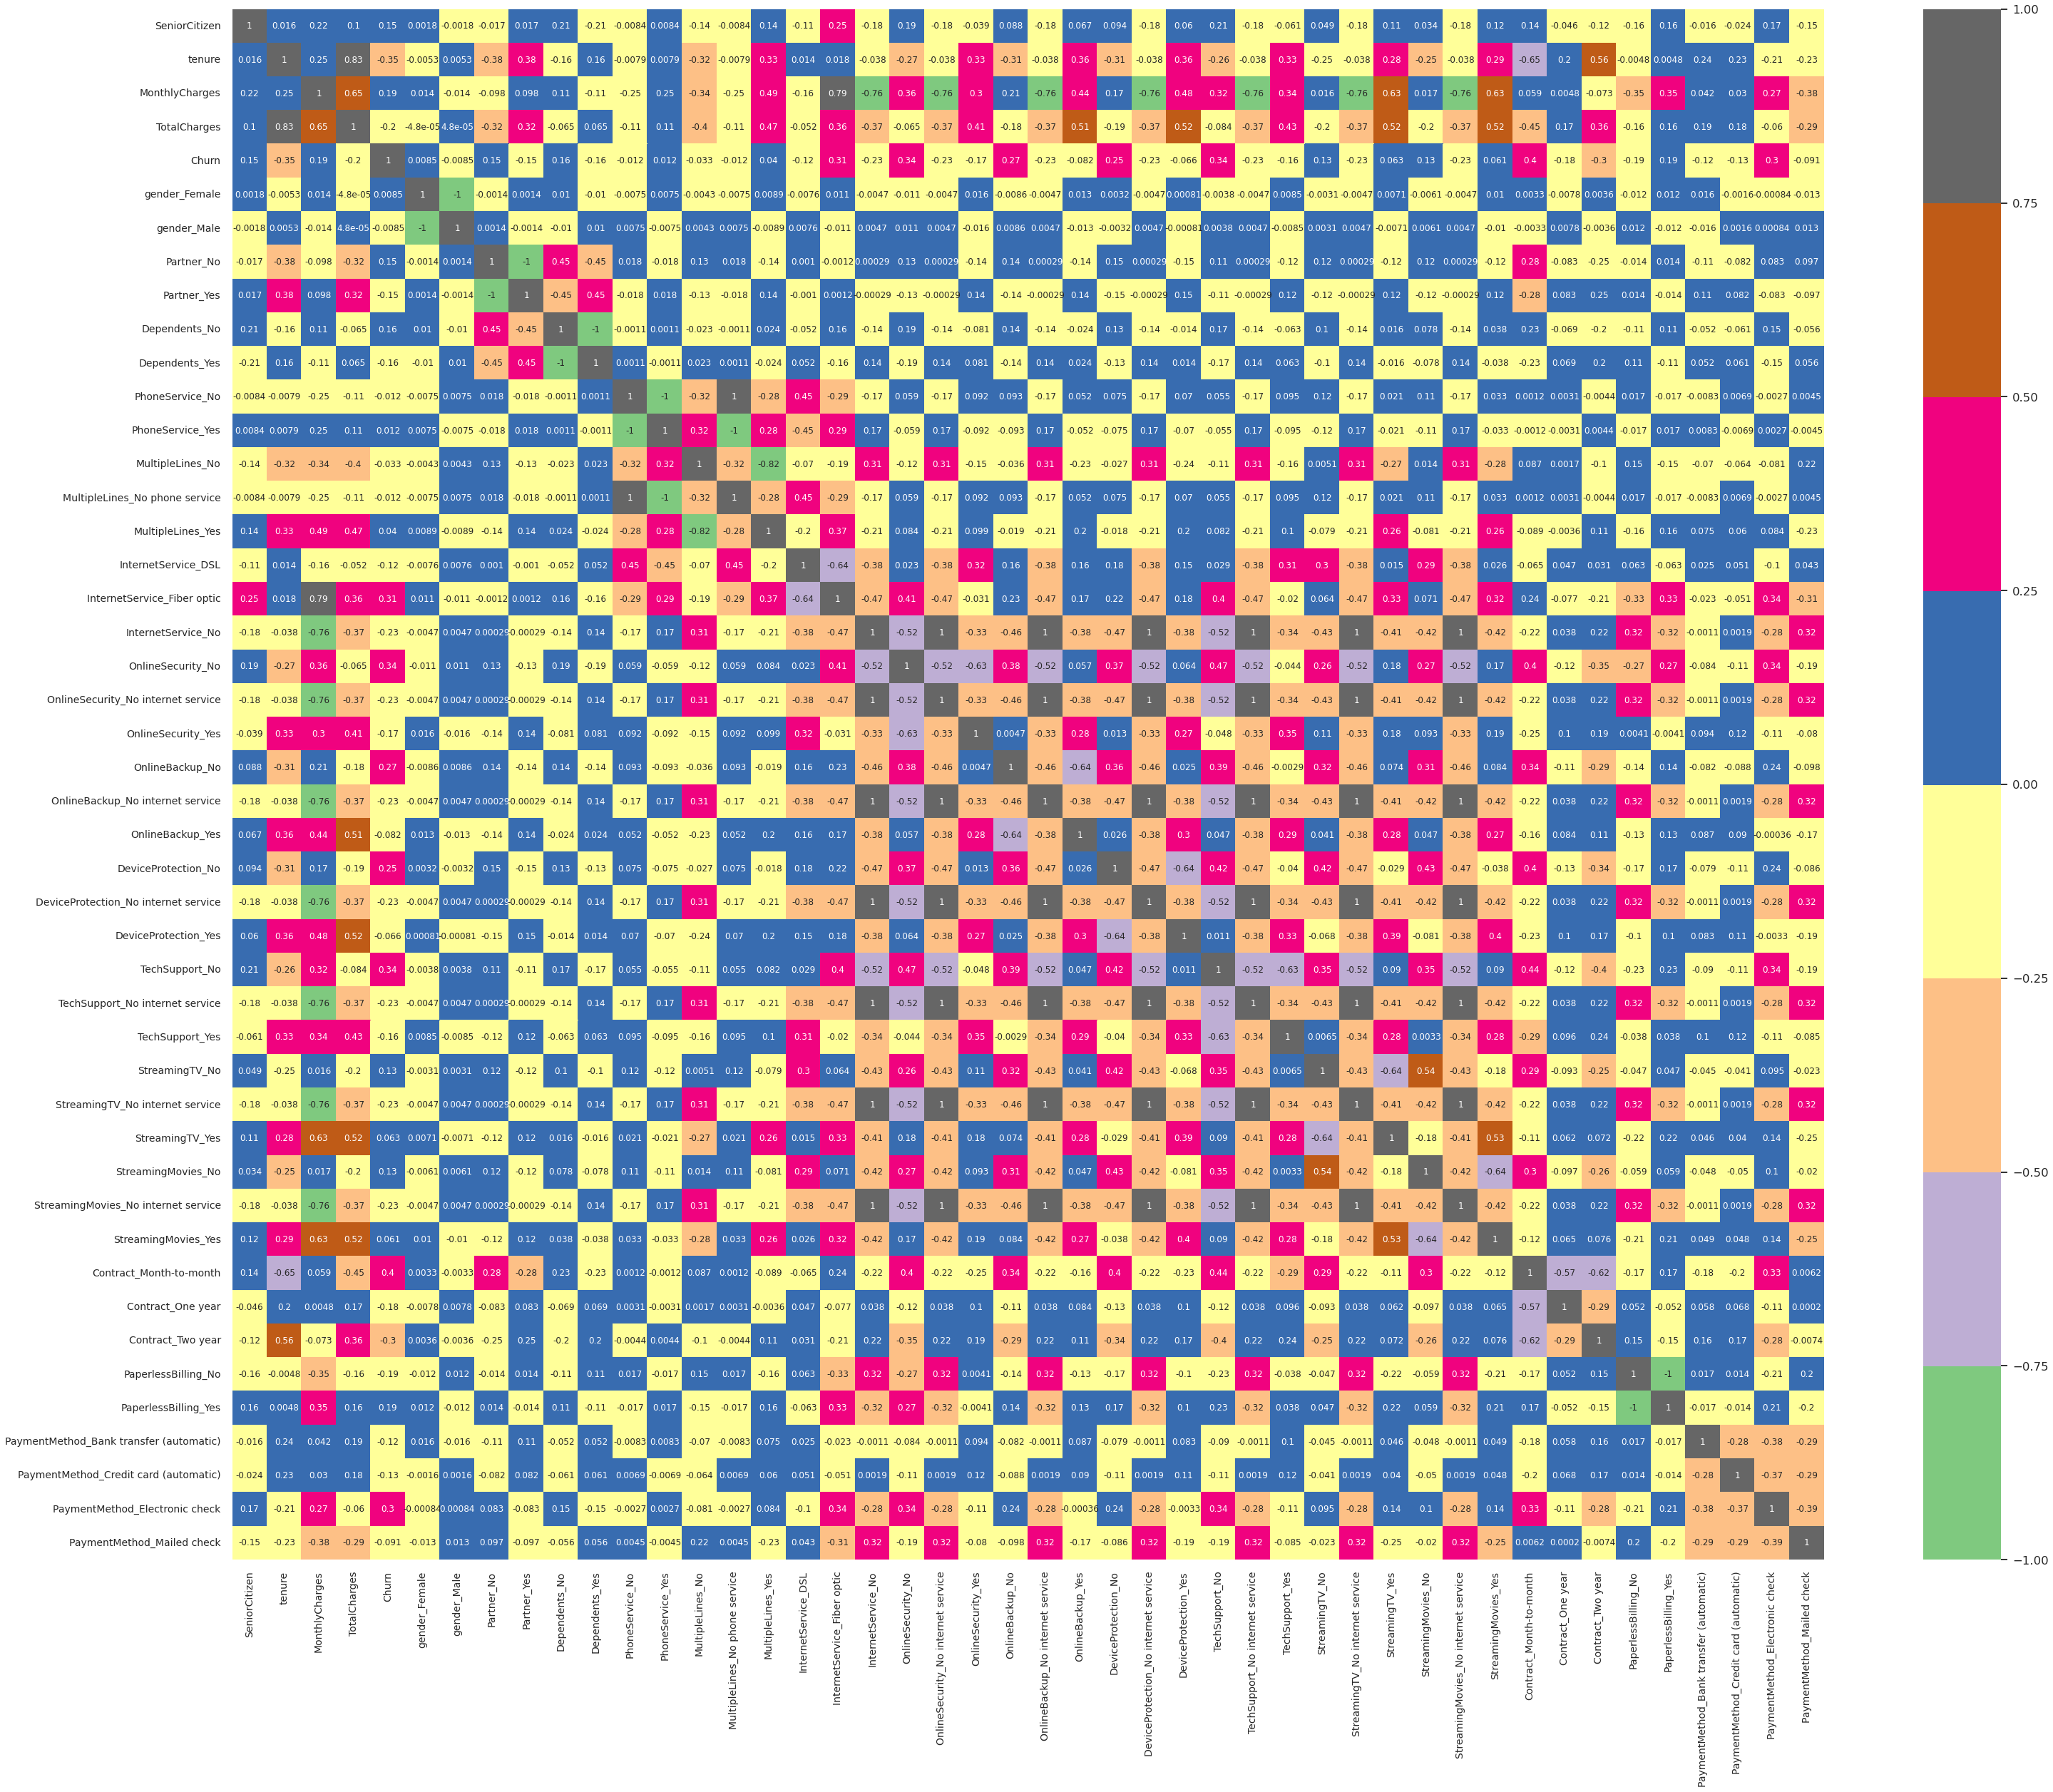

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr = df_dummies.corr()
# Set the color palette for the heatmap (optional, you can choose any color map you prefer)
cmap = 'Accent'  # color_options = ['viridis','plasma','inferno','magma','cividis','coolwarm','RdBu','tab10','tab20','Pastel1','Pastel2','Set1','Set2','Dark2','Accent',# Add more colors here if desired]
# Create the heatmap with the updated parameters
plt.figure(figsize=(50, 40))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, annot_kws={'size': 12}, cmap=cmap)

# Set the font size for the x and y tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### To avoid unstable coefficient estimates in regression, the variable 'TotalCharges' is dropped because it has high correlations with 'Tenure' and 'MonthlyCharges'. High correlations can lead to multicollinearity, making it difficult to discern the individual effects of each variable on the dependent variable. Excluding 'TotalCharges' helps maintain model stability and prevents potential misleading interpretations of the relationships between the remaining variables and the target.

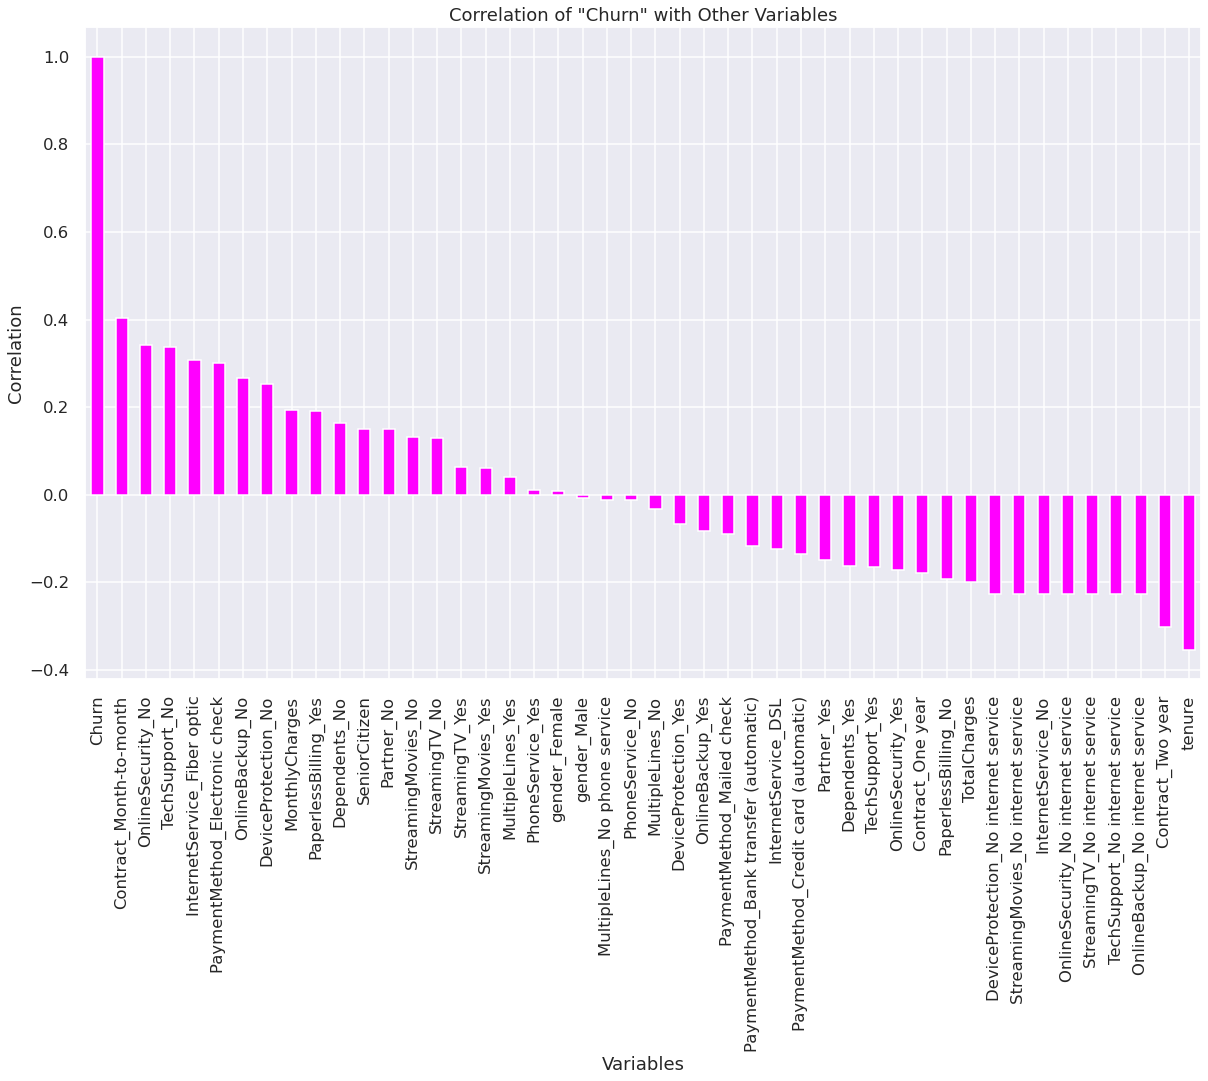

In [154]:
sns.set(style='darkgrid', context='talk', palette='Set2')  # Change the color palette

plt.figure(figsize=(20, 12))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', color='magenta')  # Specify the color

plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation of "Churn" with Other Variables')
plt.show()


#### It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No...etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No...etc. are negatively correlated with Churn.

#### Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport..., etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.

#### It is necessary to explore the patterns and correlations between the variables before modeling to gain a deeper understanding of their relationships with churn. By doing so, we can identify important variables that strongly influence churn behavior and those that may have protective effects against churn. This exploration helps us make informed decisions about feature selection, model building, and potential business strategies to reduce churn. Additionally, understanding these correlations allows us to interpret the model's results more accurately and develop effective predictive churn models.

In [155]:
df_dummies.corr()  # reporting correlation matrix

SeniorCitizen    tenure  \
SeniorCitizen                                 1.000000  0.015683   
tenure                                        0.015683  1.000000   
MonthlyCharges                                0.219874  0.246862   
TotalCharges                                  0.102411  0.825880   
Churn                                         0.150541 -0.354049   
gender_Female                                 0.001819 -0.005285   
gender_Male                                  -0.001819  0.005285   
Partner_No                                   -0.016957 -0.381912   
Partner_Yes                                   0.016957  0.381912   
Dependents_No                                 0.210550 -0.163386   
Dependents_Yes                               -0.210550  0.163386   
PhoneService_No                              -0.008392 -0.007877   
PhoneService_Yes                              0.008392  0.007877   
MultipleLines_No                             -0.136377 -0.323891   
MultipleLines_No phone service               -0.008392 -0.007877   
MultipleLines_Yes                             0.142996  0.332399   
InternetService_DSL                          -0.108276  0.013786   
InternetService_Fiber optic                   0.254923  0.017930   
InternetService_No                           -0.182519 -0.037529   
OnlineSecurity_No                             0.185145 -0.265987   
OnlineSecurity_No internet service           -0.182519 -0.037529   
OnlineSecurity_Yes                           -0.038576  0.328297   
OnlineBackup_No                               0.087539 -0.314769   
OnlineBackup_No internet service             -0.182519 -0.037529   
OnlineBackup_Yes                              0.066663  0.361138   
DeviceProtection_No                           0.094403 -0.314820   
DeviceProtection_No internet service         -0.182519 -0.037529   
DeviceProtection_Yes                          0.059514  0.361520   
TechSupport_No                                0.205254 -0.264363   
TechSupport_No internet service              -0.182519 -0.037529   
TechSupport_Yes                              -0.060577  0.325288   
StreamingTV_No                                0.048664 -0.246814   
StreamingTV_No internet service              -0.182519 -0.037529   
StreamingTV_Yes                               0.105445  0.280264   
StreamingMovies_No                            0.034196 -0.252890   
StreamingMovies_No internet service          -0.182519 -0.037529   
StreamingMovies_Yes                           0.119842  0.285402   
Contract_Month-to-month                       0.137752 -0.649346   
Contract_One year                            -0.046491  0.202338   
Contract_Two year                            -0.116205  0.563801   
PaperlessBilling_No                          -0.156258 -0.004823   
PaperlessBilling_Yes                          0.156258  0.004823   
PaymentMethod_Bank transfer (automatic)      -0.016235  0.243822   
PaymentMethod_Credit card (automatic)        -0.024359  0.232800   
PaymentMethod_Electronic check                0.171322 -0.210197   
PaymentMethod_Mailed check                   -0.152987 -0.232181   

                                         MonthlyCharges  TotalCharges  \
SeniorCitizen                                  0.219874      0.102411   
tenure                                         0.246862      0.825880   
MonthlyCharges                                 1.000000      0.651065   
TotalCharges                                   0.651065      1.000000   
Churn                                          0.192858     -0.199484   
gender_Female                                  0.013779     -0.000048   
gender_Male                                   -0.013779      0.000048   
Partner_No                                    -0.097825     -0.319072   
Partner_Yes                                    0.097825      0.319072   
Dependents_No                                  0.112343     -0.064653   
Dependents_Yes                           

# Data exploration and Visualisation

#### Doing more visualization to better understand the patterns in the data and potentially form some hypothesis. First looking at the distribution of individual variables and then slice and dice the data for to check if interesting trends are present.

## Demographics to understand the gender, age range, patner and dependent status of the customers

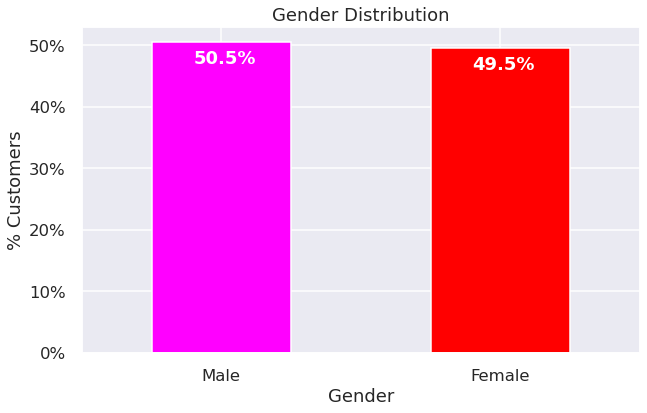

In [156]:
import matplotlib.ticker as mtick
rcParams['figure.figsize'] = 10, 6

ax = (df['gender'].value_counts() * 100.0 / len(df)).plot(kind='bar', stacked=True, rot=0, color=['magenta', 'red'])  # Specify the color as a list

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() + .15, i.get_height() - 3.5, str(round((i.get_height() / total), 1)) + '%', color='white', weight='bold')

plt.show()


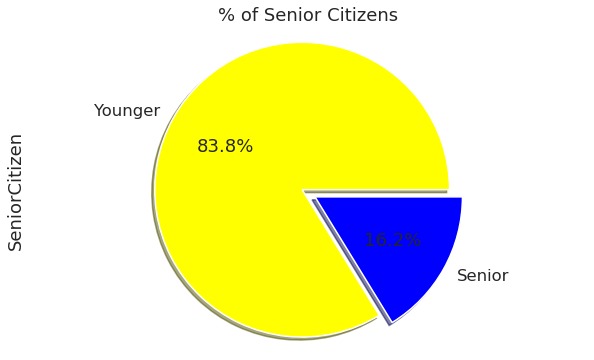

In [157]:
import matplotlib.ticker as mtick

colors = ['yellow', 'blue']  # Specify custom colors
explode = (0.1, 0)  # Specify the amount of separation between slices (explode the first slice)
shadow = True  # Add shadow to the pie plot

ax = (df['SeniorCitizen'].value_counts() * 100.0 / len(df)) \
    .plot.pie(autopct='%.1f%%', labels=['Younger', 'Senior'], colors=colors, explode=explode, shadow=shadow)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('% of Senior Citizens')

plt.axis('equal')  # Ensures the pie plot is circular
plt.show()


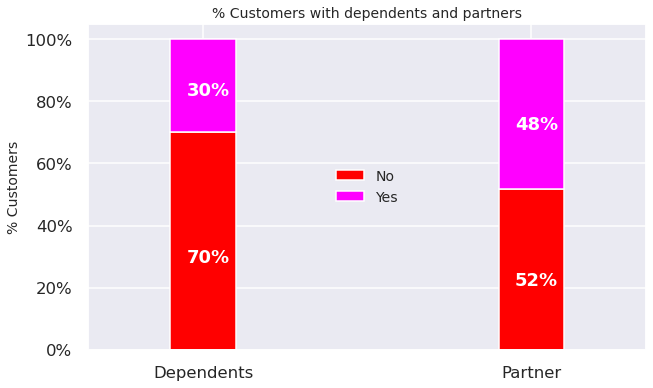

In [160]:
df = pd.melt(data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df1 = df.groupby(['variable','value']).count().unstack()
df1 = df1*100/len(data)
ax = df1.loc[:,'customerID'].plot.bar(stacked=True, figsize=(10,6),rot = 0,width = 0.2,color=['red', 'magenta'])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

# From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.

# It would be interesting is to look at the % of customers with both partners and dependents.

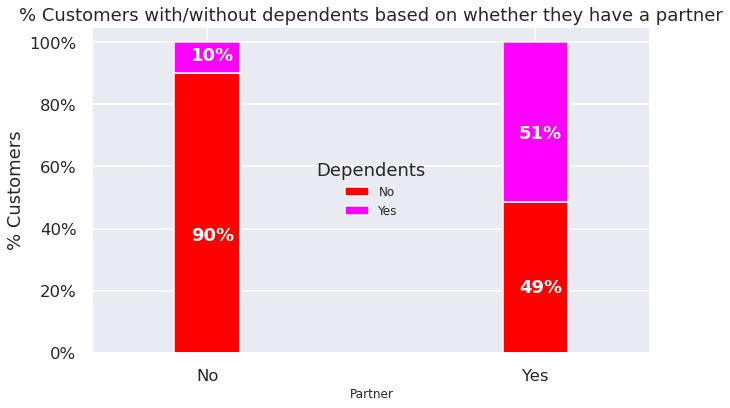

In [162]:
partner_dependents = data.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),color=['red', 'magenta'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':12},title = 'Dependents')
ax.set_ylabel('% Customers')
ax.set_title('% Customers with/without dependents based on whether they have a partner')
ax.xaxis.label.set_size(12)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold')

#### Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents

#### A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

#### Overall, the findings suggest that partner and dependent status, as well as senior citizen status, do not exhibit any significant relationships with gender in the dataset. The lack of differences in these distributions by gender indicates that these attributes are not strongly influenced by whether a customer is male or female. These insights are valuable when considering gender-related patterns in customer behavior and characteristics, as they suggest that other factors might play a more prominent role in determining partner, dependent, and senior citizen statuses.

### Customer Account Information


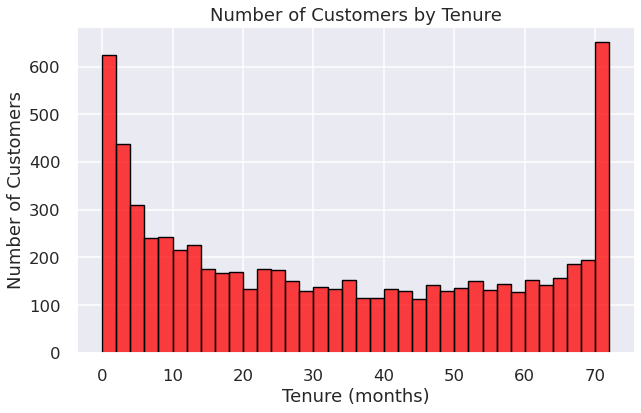

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(data['tenure'], bins=int(180/5), kde=False, color='red', edgecolor='black')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by Tenure')

plt.show()

##### The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

##### Checking the customers by tenure of contract

Text(0.5, 1.0, 'Number of Customers by Contract Type')

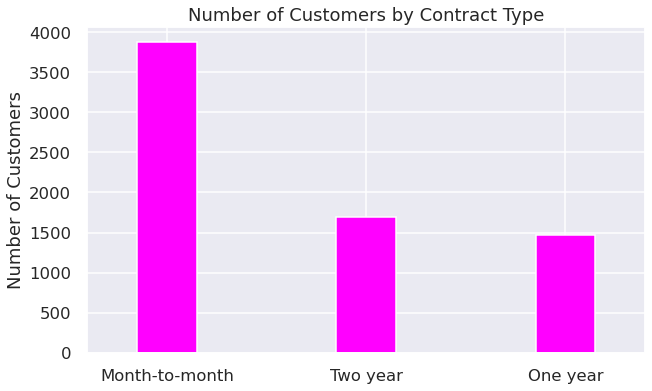

In [144]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color= 'magenta')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

#### Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

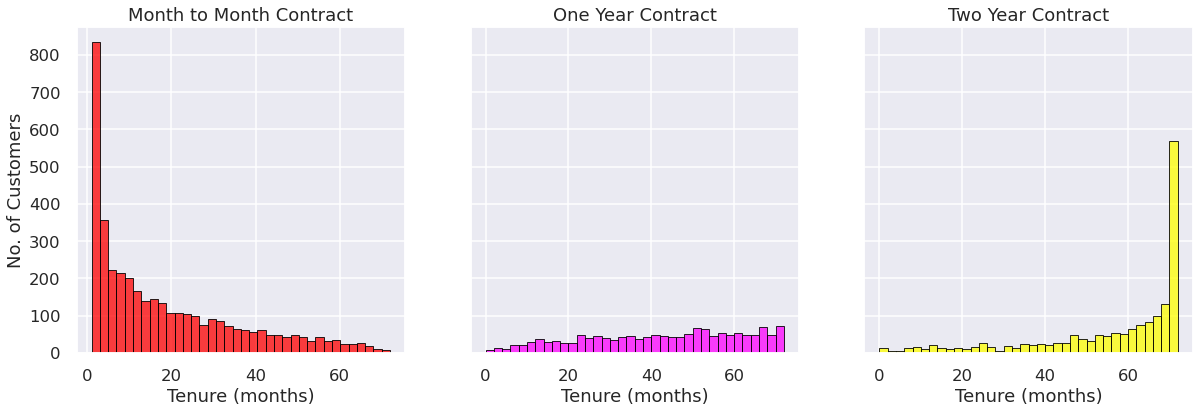

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

sns.histplot(data=data[data['Contract'] == 'Month-to-month']['tenure'],
             bins=int(180/5),
             kde=False,
             color='red',
             edgecolor='black',
             ax=ax1)
ax1.set_ylabel('No. of Customers')
ax1.set_xlabel('Tenure (months)')
ax1.set_title('Month to Month Contract')

sns.histplot(data=data[data['Contract'] == 'One year']['tenure'],
             bins=int(180/5),
             kde=False,
             color='magenta',
             edgecolor='black',
             ax=ax2)
ax2.set_xlabel('Tenure (months)')
ax2.set_title('One Year Contract')

sns.histplot(data=data[data['Contract'] == 'Two year']['tenure'],
             bins=int(180/5),
             kde=False,
             color='yellow',
             edgecolor='black',
             ax=ax3)
ax3.set_xlabel('Tenure (months)')
ax3.set_title('Two Year Contract')

plt.show()


### Visualization of the distribution of various services used by customers

In [ ]:
data.columns.values 

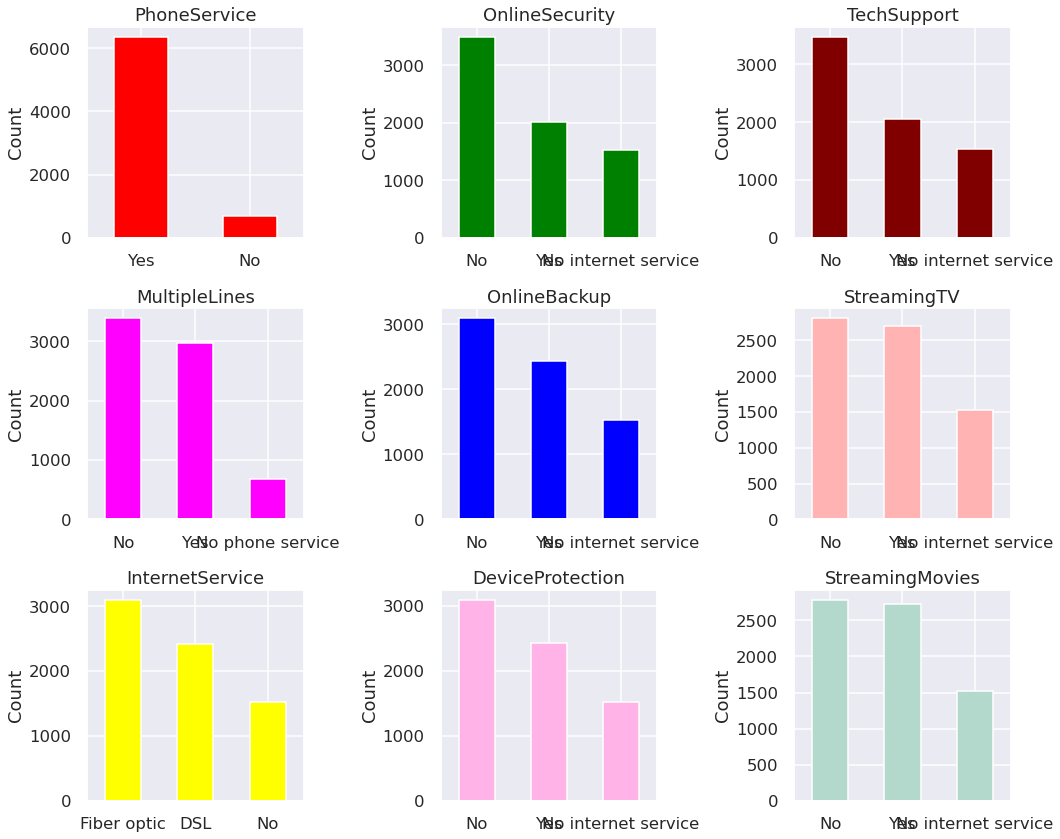

In [141]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

colors = ['red', 'magenta', 'yellow', 'green', 'blue', '#ffb3e6', 'maroon', '#ffb3b3', '#b3d9cc']  # Specify custom colors

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color=colors[i])
        
    elif i >= 3 and i < 6:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0, color=colors[i])
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0, color=colors[i])
    
    ax.set_title(item)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


#### Above plot displays a clear visbility of the different services provided by the Telecom company and availabled by the customers.



## Datamining to check prediction variable and it's interaction with other variables


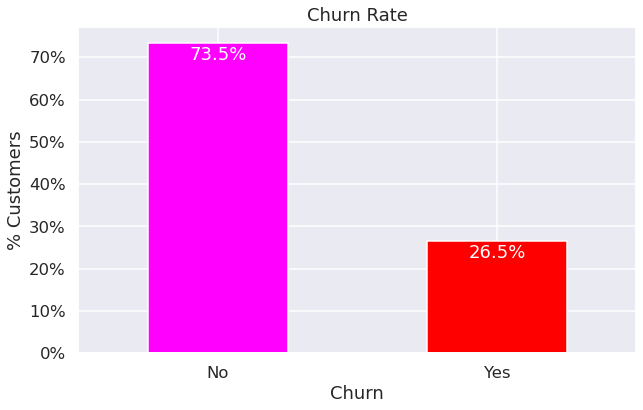

In [14]:

ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar', stacked = True,rot = 0, color=['magenta', 'red'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Rate')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%', color='white')

#### 26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn. Skeweness could lead to a lot of false negatives in predictive modeling.

#### This imbalance in the data, where the majority class (non-churn) significantly outweighs the minority class (churn), leads to a skewed distribution. In predictive modeling, this skewness can cause a lot of false negatives, meaning that the model may incorrectly predict that a customer will not churn when they actually do. This issue is critical as the model's performance might be biased towards the dominant class, making it less effective at identifying customers who are likely to churn.



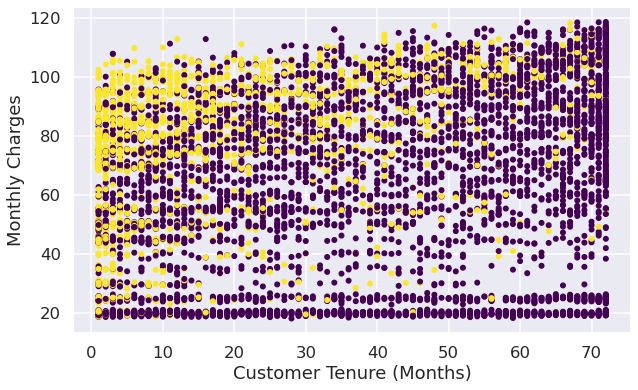

In [15]:
import seaborn as sns

rcParams['figure.figsize'] = 10, 6
sns.set(style='darkgrid', context='talk', palette='cool')  # Change the color palette

plt.scatter(df_dummies['tenure'], df_dummies['MonthlyCharges'], c=df_dummies['Churn'], cmap='viridis',s=20)
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Monthly Charges')

plt.show()


#### It’s hard to draw any conclusions from this visualization which compares the customer’s tenure with their monthly charges. So, this plot has been redrawn on boxplot for better visualization. However, from below plot, it can be clearly seen that, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.

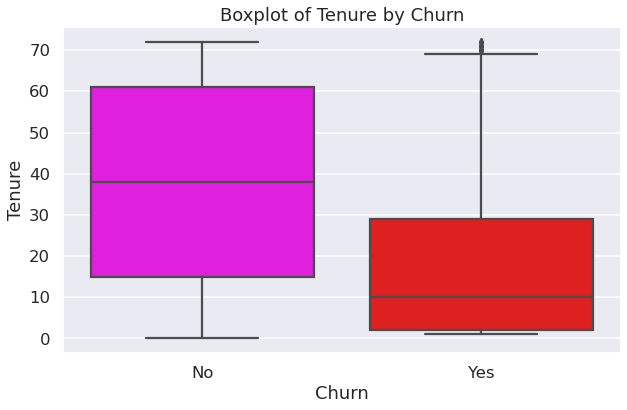

In [16]:
import seaborn as sns

sns.boxplot(x=data.Churn, y=data.tenure, palette=['magenta', 'red'])

plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Boxplot of Tenure by Churn')

plt.show()


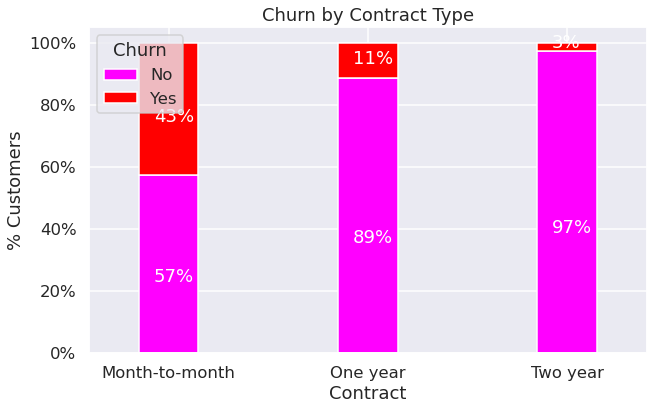

In [17]:
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, color=['magenta', 'red']) 
                                                                
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white')

#### Above plot too is no different from the correlation plot and information we obtained so far, the customers who have a month to month contract have a very high churn rate. This gives some valuable input to the sales/marketing department.

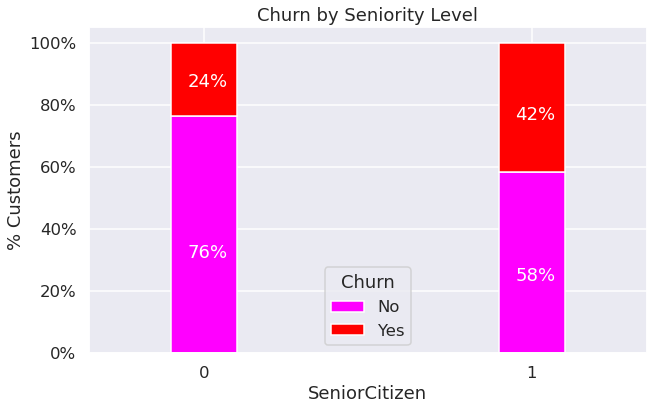

In [18]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0, color=['magenta', 'red'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white')      

#### From above plot, it is aparent that senior Citizens have almost double the churn rate than younger population. To explore the reason, the below plot was drawn which clearly shows higher % of customers churn when the monthly charges are high. This includes Sr Citizens too.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

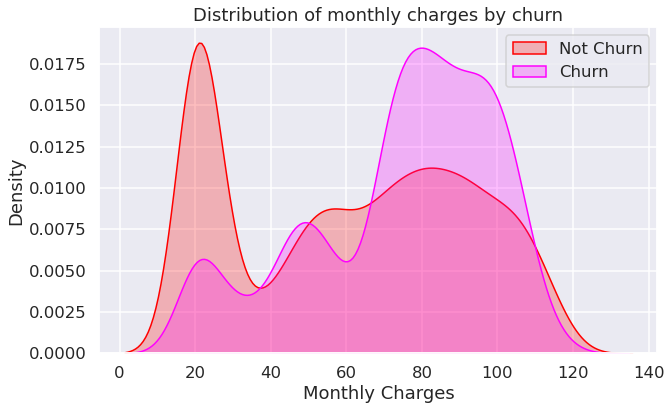

In [19]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No')], fill=True, color='red')
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, fill= True, color='magenta')
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### Assumptions
### For the purpose of this analysis, 2 assumptions can be made:

#### For each customer that left the company, it would cost Telco dollar 500.00 to replace that customer. Marketing, ads, campaigns, and outreach — the cost adds up.

#### Retain each customer who was likely to churn by investing dollar 100 in them. This could be through discounts, improving service (upping their internet speed, for example), or offering perks.

### Above measures are part of diagnostic analytic.

### Predictive modelling
#### We will consider several different models to predict customer churn. To ensure we are not over-fitting to our data, we will split the 7,043 customer records into a training and test set, with the test set being 20% of the total records. It is important to scale the variables in regression so that all of them are within a range of 0 to 1.

#### Logistic regression requires there to be little or no multicollinearity among the independent variables. Therefore, as discussed in the begining, Total Charges will be removed.

In [20]:
df_dummies = df_dummies.drop("TotalCharges", axis=1) # removing Total Charges to avoid multicolinearity.

# Using the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Methodology

Our first step was to split our data into training and test sets using train-test-split, which would allow us to cross-validate our results later. We also stratified the train-test-split, to ensure that the same proportion of our target variable was found in both our training and test sets.

Spiliting the data

X is the data with the independent variables(input features), Y is the data with the dependent variable(to be predicted). The test size variable determines in which ratio the data will be split. It is quite common to do this in a 80 Training / 20 Test ratio. Also ned to stratify the train-test-split to have a balanced split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))


length of X_train and x_test:  5625 1407
length of y_train and y_test:  5625 1407


The code snippet provided is using the train_test_split function from the sklearn.model_selection module to split the data into training and test sets.

The independent variables (X) and the dependent variable (y) are passed as arguments to the function. The test_size parameter is set to 0.2, indicating that 20% of the data will be allocated for testing, while the remaining 80% will be used for training.

The random_state parameter is set to 101, which ensures that the random splitting of the data is reproducible. Additionally, the stratify parameter is set to y, which ensures that the splitting is performed in a way that maintains the proportion of churned and non-churned customers in both the training and test sets.

The lengths of the resulting training and test sets for both the independent variables (X_train, X_test) and the dependent variable (y_train, y_test) are printed, providing an overview of the sizes of each set.

# Logistic Regression
Logistic regression is a machine learning algorithm used for predicting categorical outcomes, such as whether a customer churned or not (churn 1 or churn 0). By training a logistic regression model on the training dataset, we can utilize this model to make predictions on the test dataset. The predicted churn values for the test dataset are stored in a variable called "prediction_test." To evaluate the performance of the model, the accuracy score is calculated, which measures the proportion of correctly predicted churn values compared to the actual churn values in the test dataset. The accuracy score is then printed to provide an assessment of the model's predictive accuracy.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

model = LogisticRegression(solver='lbfgs', max_iter=1000)
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
y_pred = prediction_test #prediction

# Print the prediction accuracy
print ("Prediction in %:",100*metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))


Prediction in %: 80.17057569296375
Precision: 0.6655052264808362
Recall: 0.5106951871657754


#### solvers types and importance

In the context of the LogisticRegression model in scikit-learn, a solver refers to the optimization algorithm used to find the optimal parameters for the logistic regression model. The solver determines how the model's cost function is minimized and the coefficients are estimated. Different solvers have varying strengths and are suitable for different types of problems and datasets.

Here are the solver options available in scikit-learn's LogisticRegression model:

'newton-cg': This solver uses the Newton-Conjugate Gradient algorithm.

'lbfgs': It stands for Limited-memory Broyden-Fletcher-Goldfarb-Shanno and uses the Quasi-Newton method.

'liblinear': This solver is based on the LIBLINEAR library and is suitable for small datasets.

'sag': It stands for Stochastic Average Gradient and uses a stochastic average of the gradients.

'saga': An extension of 'sag' that also supports the L1 penalty.

The LogisticRegression model in scikit-learn offers various solver options, including 'liblinear', 'newton-cg', 'sag', 'saga', and 'lbfgs'. These solvers cater to different dataset sizes and regularization needs. 'liblinear' is suitable for small datasets, 'newton-cg' works well for both small and large datasets, 'sag' and 'saga' are designed for large-scale problems, and 'lbfgs' is recommended for small to medium-sized datasets. It's essential to select the appropriate solver based on the dataset characteristics. Experimentation with different solvers is often beneficial to determine the one that yields the best performance.

In [23]:
print('Intercept: ' + str(result.intercept_)) # reporting the intercept
print('Regression: ' + str(result.coef_)) # reporting the co-efficients


Intercept: [-0.98796454]
Regression: [[ 0.18715203 -2.43931051 -0.00852662  0.01488481 -0.01485236  0.01063183
  -0.01059938  0.11062872 -0.11059627  0.11728073 -0.11724828 -0.17017432
   0.11728073  0.05292604 -0.45958971  0.56526352 -0.10564136  0.22501643
  -0.10564136 -0.11934262  0.11825689 -0.10564136 -0.01258308  0.04802402
  -0.10564136  0.05764979  0.2254066  -0.10564136 -0.11973279 -0.08884815
  -0.10564136  0.19452196 -0.08917765 -0.10564136  0.19485146  0.6214897
  -0.04373557 -0.57772168 -0.15446256  0.15449501 -0.03627493 -0.15979595
   0.24576997 -0.04966664]]


Confusion matrix
[[937  96]
 [183 191]]


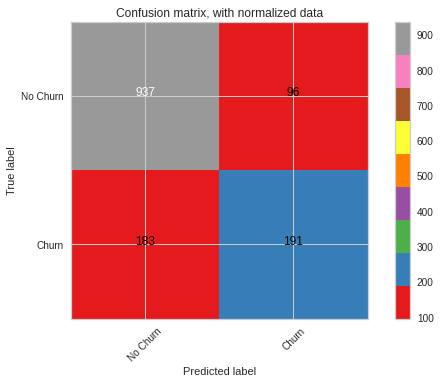

In [119]:
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes, title ='Confusion matrix', normalize = False, cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='Set1')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# color_options = ['viridis','plasma','inferno','magma','cividis','coolwarm','RdBu','tab10','tab20','Pastel1','Pastel2','Set1','Set2','Dark2','Accent',# Add more colors here if desired]

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Churn','Churn'],
                      title='Confusion matrix, with normalized data')

The provided code includes a function called plot_confusion_matrix that helps visualize the confusion matrix. The confusion matrix is a tabular representation of the performance of a classification model, showing the true and predicted labels for each class.

The function takes the confusion matrix (cm), classes, title, normalization flag, and color map as input parameters. If the normalize flag is set to True, the confusion matrix is normalized by dividing each element by the sum of its respective row.

The confusion matrix is printed, and then the plot is generated using plt.imshow(), which visualizes the matrix as a heatmap. The title and colorbar are set, and the x-axis and y-axis labels are defined.

The function also adds text annotations to each cell of the plot, showing the corresponding values of the confusion matrix. If the cell value is greater than half of the maximum value, the text color is set to white; otherwise, it's set to black.

The function is called with the computed confusion matrix (cnf_matrix), the classes ('No Churn' and 'Churn'), and the desired title. The resulting plot displays the confusion matrix with clear labels, aiding in the interpretation and evaluation of the classification model's performance.

### Insights
he overall classification rate of 80% may initially seem like a good accuracy score. However, accuracy alone may not be the right measure when dealing with imbalanced data, where the target class (in this case, churned customers) is not balanced with the non-churned class. To gain a more comprehensive understanding of the model's performance, additional measures such as precision, recall, and F1 score should be considered.

In this case, the precision for predicting churn (positive class) is 0.66%, indicating that the model correctly identifies only 66% of the actual churned customers. The recall, which measures the model's ability to find all positive instances, is 0.51%, suggesting that the model misses approximately 49% of the churned customers. These values indicate that the dataset is indeed imbalanced, with a significant class imbalance between churned and non-churned customers.

To better evaluate the model's performance, the confusion matrix provides a detailed breakdown of the true positives, true negatives, false positives, and false negatives. This breakdown helps to understand the types of errors the model is making and assess its effectiveness.

#### F1 Score:

The F1 score is a metric that combines precision and recall into a single value, providing a balanced measure of a model's performance. It is calculated as the harmonic mean of precision and recall.The F1 score ranges between 0 and 1, with 1 being the best score and indicating a perfect balance between precision and recall. A score of 0 indicates poor performance, suggesting that either precision or recall is close to zero.
In summary, the F1 score is a useful metric for evaluating the overall performance of a classification model, considering both precision and recall simultaneously.



Considering the end goal of the project, which is to reduce churn and take appropriate preventive actions, it is crucial to identify the independent variables that have the most influence on the predicted outcome. This can be achieved by examining the weights (coefficients) of each variable in the model. By setting the coefficients to zero, one can review the weights of each variable, providing insights into which factors have the most significant impact on customer churn.

By focusing on the influential variables and taking targeted actions to retain customers, the company can mitigate churn effectively and allocate resources optimally to minimize customer losses.

In [25]:
#F1 Score
f1 = (2*0.6577181208053692*0.5521126760563381)/(0.6577181208053692 + 0.5521126760563381)
print("F1 Score {:0.2f}".format(f1))


F1 Score 0.60


In [26]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.621490
InternetService_Fiber optic                0.565264
PaymentMethod_Electronic check             0.245770
TechSupport_No                             0.225407
OnlineSecurity_No                          0.225016
StreamingMovies_Yes                        0.194851
StreamingTV_Yes                            0.194522
SeniorCitizen                              0.187152
PaperlessBilling_Yes                       0.154495
OnlineBackup_No                            0.118257
PhoneService_No                            0.117281
MultipleLines_No phone service             0.117281
Dependents_No                              0.110629
DeviceProtection_Yes                       0.057650
MultipleLines_Yes                          0.052926
DeviceProtection_No                        0.048024
gender_Female                              0.014885
Partner_No                                 0.010632
MonthlyCharges                            -0.008527
Partner_Yes 

It can be observed that some variables have a positive relation to our predicted variable (Churn) and some have a negative relation.
- “Contract_Month-to-month”: The positive relation to churn means that having this type of contract also increases the 
   probability of a customer to churn. 
- “Contract_Two year” is in a highly negative relation to the predicted variable, which means that customers with this type 
   of contract are very unlikely to churn. 

Some of the variables do not make sense in the first point.

“Fiber_Optic” (as per the earlier plots) is on top of this list in terms of a positive impact on churn. While it is expected that advantage of Fiber optic makes a customer stay, but the model has a different story to tell. Here it is important to delve deeper into the analysis and get some context for the data.


### The AUC-ROC (Area Under the Curve of the Receiver Operating Characteristics) 
This curve is a popular evaluation metric for binary classification models. It measures the model's ability to distinguish between the positive class (Churn) and the negative class (NoChurn).

The AUC-ROC score ranges from 0 to 1, with a higher score indicating a better-performing model. An AUC-ROC score of 1 means the model has perfect discrimination, correctly classifying all Churn and NoChurn instances. Conversely, a score of 0.5 suggests the model performs no better than random guessing.

The AUC-ROC curve is created by plotting the True Positive Rate (sensitivity or recall) against the False Positive Rate (1 - specificity). The curve demonstrates how well the model separates the positive and negative classes across various classification thresholds.

Interpreting the AUC-ROC curve, the closer the curve is to the top-left corner (0, 1), the better the model's performance. A curve that hugs the top-left corner indicates high true positive rates and low false positive rates, indicating a good balance between sensitivity and specificity.

In summary, the AUC-ROC score quantifies how well a binary classification model distinguishes between Churn and NoChurn. A higher AUC-ROC score suggests better discrimination and indicates that the model is effective at correctly predicting Churn and NoChurn instances.

In [27]:
#pip install scikit-plot

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

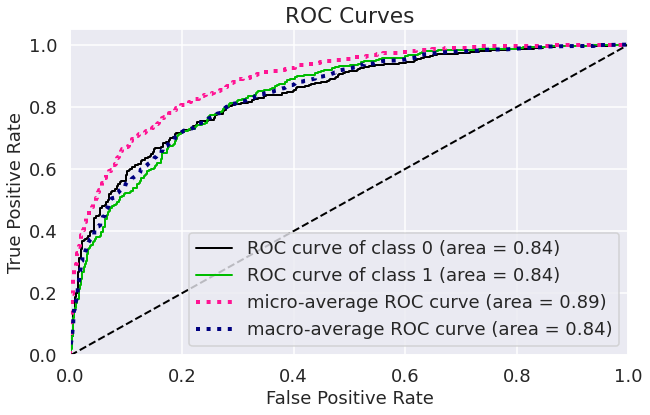

In [28]:
import scikitplot as skplt #to make things easy
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba)


Area Under ROC Curve (AUROC) represents the likelihood of the model distinguishing observations between two classes. AUROC gives a single measure of how a model’s true positive rate and false positive rate change with different threshold values. The closer a model’s AUROC score is to 1, the better it is. In the above plot, both are above 0.5 however, suggesting that both models have the ability to distiguish between observations from each class.

            tpr (True positive rate) = TP / TP + FN
Fraction of positive examples correctly classified

            fpr (false positive rate) = FP / FP + TN
Fraction of negative examples incorrectly classified

AUC is 0.84 means there is 84% chance that model will be able to distinguish between Churn and NoChurn.

Handling imbalanced classes

In [29]:
df_dummies['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

The class for churn is only around 30% of the total population of samples. There is a real risk thatthe model trained on this data may only make too many predictions in favour of the majority class. To balance the data set, need to randomly duplicate observations from the minority class.

#### WHY DUPLICATE ?
Balancing the dataset is important when the target class (in this case, churned customers) is significantly underrepresented compared to the majority class (non-churned customers). When the class distribution is imbalanced, a model trained on such data may have a bias towards the majority class and perform poorly in identifying instances of the minority class.

In this scenario, the class imbalance issue arises because the churn class represents only around 30% of the total population of samples, while the non-churn class represents the majority. If the model is trained on this imbalanced data without addressing the class imbalance, it is likely to prioritize accuracy by predicting the majority class more frequently. Consequently, the model may overlook or misclassify instances of the minority class, resulting in poor performance in predicting churn.

To address this, randomly duplicating observations from the minority class can help balance the dataset. By increasing the representation of the minority class through duplication, the model can better learn from and allocate sufficient importance to the churned customers. This balanced dataset enables the model to have a fair representation of both classes during training, helping it to make more accurate predictions and improve its ability to identify churned customers.

Balancing the dataset is essential to ensure that the model's performance is not skewed towards the majority class and to give sufficient attention to the minority class, allowing for better insights and decision-making related to customer churn.

#### Resampling the data to make the two classes Churn and noChurn equal

In [30]:
from sklearn.utils import resample
 
data_majority = df_dummies[df_dummies['Churn']==0]
data_minority = df_dummies[df_dummies['Churn']==1]
 
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5163, #same number of samples as majority class
random_state=1) #set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
data_upsampled['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

#### Now that we have a 1:1 ratio for our classes, will train another logistic regression model


In [31]:
from sklearn.metrics import classification_report

train, test = train_test_split(data_upsampled, test_size = 0.20)
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr_balanced = LogisticRegression(solver='lbfgs', max_iter=1000)
logisticRegr_balanced.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred_balanced = logisticRegr_balanced.predict(test_x_upsampled)

In [32]:
#pip install yellowbrick

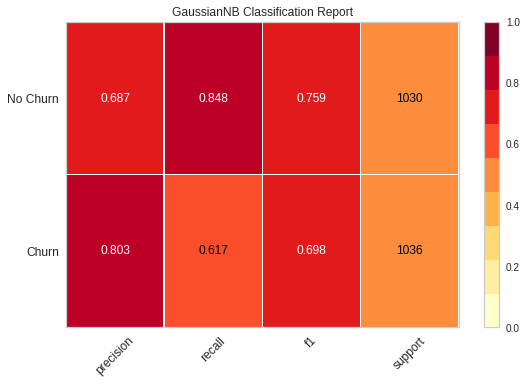

In [33]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

classes=['Churn','No Churn']

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(train_x_upsampled, train_y_upsampled)  # Fit the visualizer and the model
visualizer.score(test_x_upsampled, test_y_upsampled)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

### GaussianNB : A naive_bayes based classifier
The provided code demonstrates the use of the ClassificationReport visualizer from the Yellowbrick library to evaluate the performance of a Gaussian Naive Bayes classifier on the upsampled training and test data.

First, the classes are defined as ['Churn', 'No Churn'] to specify the labels for the positive and negative classes.

Next, the Gaussian Naive Bayes classifier is instantiated as bayes. Then, the ClassificationReport visualizer is initialized with the classifier (bayes) and the specified classes.

The visualizer is fitted to the upsampled training data using visualizer.fit(train_x_upsampled, train_y_upsampled). This step trains the Gaussian Naive Bayes classifier on the upsampled training data.

Next, the performance of the classifier is evaluated on the upsampled test data using visualizer.score(test_x_upsampled, test_y_upsampled). This step calculates various classification metrics such as precision, recall, F1-score, and support for each class.

Finally, the visualizer.poof() method is called to display the visualization of the classification report, which includes a detailed summary of the classification metrics for each class.

The purpose of using the ClassificationReport visualizer is to gain insights into the performance of the Gaussian Naive Bayes classifier in terms of precision, recall, and other metrics. It provides a comprehensive summary of the classifier's performance for both the positive and negative classes, allowing for a better understanding of how well the model is distinguishing between churn and non-churn instances.

#### Insights from data
From above output it can be see that, the overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved.
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

The model’s precision for No Churn 69%) is lower than Churn (82%) but precision is higher (86%) than churn (62%). The F1-score for the NoChurn is higher (76.6%), while for the Churn is is 71%. The overall accuracy of the model has decreased, but the precision and recall scores for predicting a churn have improved in this model.

In [34]:

from sklearn.metrics import roc_auc_score
 

# Get class probabilities for both models
test_y_prob = model.predict_proba(X_test)
test_y_prob_balanced = model.predict_proba(test_x_upsampled)


# We only need the probabilities for the positive class
test_y_prob = [p[1] for p in test_y_prob]
test_y_prob_balanced = [p[1] for p in test_y_prob_balanced]
 
print('Unbalanced model AUROC: ' + str(roc_auc_score(y_test, test_y_prob)))
print('Balanced model AUROC: ' + str(roc_auc_score(test_y_upsampled, test_y_prob_balanced)))

Unbalanced model AUROC: 0.8408094382697195
Balanced model AUROC: 0.7400312066574203



AUROC scores are >7.0 in both the models. Unbalanced model is >8.0. This suggests that both models have the ability to distiguish between observations from each class.


### K-fold cross validation
10-fold Cross-validation is used to estimate the skill of model. 

K-fold cross-validation is a technique used to estimate the performance and evaluate the robustness of a model. It involves splitting the dataset into K equal-sized folds or subsets. The model is trained and tested K times, where each fold acts as a testing set once and the remaining K-1 folds are used as the training set. This process allows for comprehensive assessment by ensuring that each data point appears in the testing set exactly once. The performance measures, such as accuracy or concordance, are then averaged across the K iterations to obtain an overall estimate of the model's performance. K-fold cross-validation helps mitigate the variability and bias that may arise from a single train-test split and provides a more reliable evaluation of the model's generalization ability.

In [36]:
from sklearn.model_selection import cross_val_score

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(result, X_train, y_train, scoring='accuracy', cv=10)
print (' 10 fold cross-validation scores: ' ,scores)
print('Mean of scores: ', scores.mean())

 10 fold cross-validation scores:  [0.79 0.81 0.81 0.81 0.79 0.77 0.83 0.8  0.8  0.82]
Mean of scores:  0.8033801508188846


### Model has provided 80% accuracy so far after all necessary validation and cross validation.


# Survival Analysis



Survival analysis is a statistical method used to study the time until a specific event happens. For example, in a telecom company, we might be interested in how long customers stay before they cancel their subscription (churn).

In survival analysis, we look at two main pieces of information for each customer: their "tenure" (how long they have been a customer) and whether they have "churned" (cancelled their subscription) at a specific observation time.

To understand survival analysis, we need to introduce a few concepts:

Probability Density Function (PDF): This function tells us the likelihood of an event happening at a particular time. In our case, it gives us the probability of a customer churning at a specific duration.

Cumulative Distribution Function (CDF): The CDF gives us the probability that the event (churn) has occurred by a certain time. It tells us how many customers have churned before a given duration.

Survival Function: This function gives us the probability that the event (churn) has not happened by a particular time. It tells us how many customers are still active and haven't churned before a given duration.

Hazard Function: This function measures the risk or likelihood of an event happening within a very small time interval. In our case, it tells us the probability of a customer churning within a tiny time window, given that they have survived up to that point.

The Cox Proportional Hazards (CoxPH) model is a common method used in survival analysis. It considers different factors or "covariates" like gender, monthly charges, dependents, partner, phone service, etc., and examines how these factors affect the likelihood of churn over time. The CoxPH model assumes that the effect of these factors on churn remains constant over time.

The Kaplan-Meier estimator is another technique used in survival analysis. It provides an estimation of the survival function without making assumptions about the underlying distribution of churn. This estimator is useful when we don't know the specific distribution or when it's difficult to describe.

By using survival analysis, telecom companies can understand how long customers are likely to stay before cancelling their subscription (churn). They can also identify factors that influence the likelihood of churn and make informed decisions to improve customer retention strategies.

In summary, survival analysis helps us analyze customer churn over time, considering factors like tenure and various characteristics. It provides insights into the probability of churn at different durations and helps companies understand how different factors impact customer retention.

## Kapalan-Meier and Cox Proportional Hazards Model

Kapalan is fully parametric and the Cox PH Model is semi-parametric.

Kapalan-Meier Kaplan-Meier need specification of the distribution of the underlying hazard. CoxPH analyses the covariates (features) of a dataset with regards to how long a customer survives. It describes how each feature proportionally increases risk over the baseline survival rate for a cohort.

Mathematical Intuition
T is the time from customer’s(a randomly selected customer) subscription to the customer churn. It is a continuous random variable, therefore it can take any real value.

T has a probability density function f(t) , and cumulative distribution function F(t) . pdf : f(t) cdf : F(t)

As per the definition of cdf from a given pdf, we can define cdf as: F(t) = P (T< t) here , F(t) gives us the probability that the event has occurred by duration t.

Survival Function: S(t) = 1 - F(t)= P(T ≥t)

S(t) gives us the probability that the event has not occurred by the time t.

Hazard Function -h(t) : Along with the survival function, we are also interested in the rate at which event is taking place, out of the surviving population at any given time t. h(t) = [( S(t) -S(t + dt) )/dt] / S(t) limit dt → 0

Here we have each customer’s tenure when they churned (the event time T) and the customer’s Gender, MonthlyCharges, Dependants, Partner, PhoneService etc. The other variables are the covariates in this example. We are interested in how these covariates impacts the survival probability function.

In such cases, it is the conditional survival function S(t|x) = P(T > t|x). Here x denotes the covariates. In our example, we are interested in S(tenure > t|(Gender, MonthlyCharges, Dependants, Partner, PhoneService etc)).

The Cox model assumes that the covariates have a linear multiplication eﬀect on the hazard function and the eﬀect stays the same across time.

From its formulation above we can see that it has two parts. Lets understand each part

Instantaneous rate of event: ( S(t) -S(t + dt) )/dt this can also be seen as the slope at any point t of the Survival Curve, or the rate of dying at any time t.

Also lets assume the total population as P.

here, S(t) -S(t + dt) , this difference gives proportion of people died in time dt, out of the people who survived at time t.

- Number of customers surviving at t is S(t)*P  
- number of customers surviving at t+dt is S(t+dt)*P. 
- Number of customers left during dt is (S(t) -S(t + dt))*P. 
- Instantaneous rate of customers leaving at time t is (S(t) -S(t + dt))*P/dt.
Proportion Surviving at time t: S(t); We also know the surviving population at time t, S(t)*P.

Thus dividing number of customers left in time dt, by the number of customers survived at any time t, gives us the hazard function as measure of RISK of the customer leaving, which survived at the time t.

The hazard function is the probability of failure in an inﬁnitesimally small time period between (t) and (t+ dt) given that the subject has survived up till time t. In this sense, the hazard is a measure of risk: the greater the hazard between times t1 and t2, the greater the risk of failure in this time interval.

We have : h(t) = f(t)/S(t) ; Since we know that ( S(t) -S(t + dt) )/dt = f(t)

This is a very important derivation. The Survival function can be derived from Hazard function and vice versa.

For each customer, two important data points for survival analysis are required
‘Tenure’: how long they have been a customer when the data is observed ‘Churn’: whether or not the customer left when the data was observed

In [37]:
# transform tenure and churn features
data['tenure'] = data['tenure'].astype(float)
data['Churn'] = data['Churn'] == 'Yes'
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   
3  7795-CFOCW    Male              0      No         No    45.0           No   
4  9237-HQITU  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85  False  
1               Mailed check          56.95        1889.5  False  
2               Mailed check          53.85        108.15   True  
3  Bank transfer (automatic)          42.30       1840.75  False  
4           Electronic check          70.70        151.65   True  

[5 rows x 21 columns]

In [ ]:
#conda install lifelines


In [40]:
# Kaplan-Meier
import lifelines
from lifelines import KaplanMeierFitter

# fitting kmf to churn data
t = data['tenure']
churn = data['Churn']
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, churn, label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

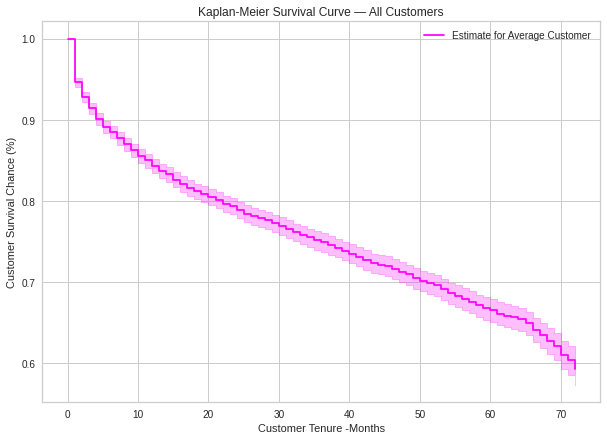

In [106]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax, color= 'magenta')
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer Tenure -Months')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

The above plot provides some basic intuition about the customers. The expectation is that, churn is relatively low. From the plot, within 1-2 years, company retained almost 80-90% of their customers. But there is steady decline and after over 70 months, the company is able to retain almost 60% of their customers. This input is quite useful for the telecom company to undertand the trend and business forecast.

To examine the effects of different variables, the Cox Proportional Hazards Model is used.

This is a Survival Regression model. ‘Hazards’ can be thought of something that would increase/decrease chances of customer retention. A hazard may be the type of contract a customer has. Customers with multi-year contracts probably cancel less frequently than those with month-to-month contracts. One restriction is the model assumes a constant ratio of hazards over time across groups.

#### Applying Cox Proportional Hazard Model
Cox proposed fitting the coefficients of the Hazard function using a partial likelihood method. The advantage of Cox Proportional Hazards regression is that the survival models can be fitted without the distribution assumption.

The time to event for a customer in the dataset is very important for the survival curves at the aggregate level; however, in real life situations along with the event data the covariates (features) of that individual will be pesent. Therefore, it is very important to know about the impact of covariates on the survival curve. This would help in predicting the survival probability of a customer, ifthe associated covariates values are known.

The data has each customer’s tenure when they churned (the event time T) and the customer’s Gender, MonthlyCharges, Dependants, Partner, PhoneService etc. The other variables are the covariates here. It would be interesting to know how these covariates impacts the survival probability function.

In such cases, it is the conditional survival function S(t|x) = P(T > t|x). Here x denotes the covariates. We are interested in S(tenure > t|(Gender, MonthlyCharges, Dependants, Partner, PhoneService etc)).

In [53]:
a = pd.read_csv('/home/angshumanmandal/Angshuman/RUNS FOR GENETIC ALGO/Telco-customer-churn.csv')
a.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  

[2 rows x 21 columns]

In [54]:
dummies = pd.get_dummies(a[[
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn'
]])
a = dummies.join(a[['MonthlyCharges', 'TotalCharges']])

In [55]:
a['TotalCharges'] = a[['TotalCharges']].replace([' '], '0')
a['TotalCharges'] = pd.to_numeric(a['TotalCharges'])

In [56]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   gender_Female                            7043 non-null   uint8  
 3   gender_Male                              7043 non-null   uint8  
 4   Partner_No                               7043 non-null   uint8  
 5   Partner_Yes                              7043 non-null   uint8  
 6   Dependents_No                            7043 non-null   uint8  
 7   Dependents_Yes                           7043 non-null   uint8  
 8   PhoneService_No                          7043 non-null   uint8  
 9   PhoneService_Yes                         7043 non-null   uint8  
 10  MultipleLines_No                         7043 no

In [57]:
a = a[['SeniorCitizen',
       'tenure',
       'gender_Female',
       'Partner_Yes',
       'Dependents_Yes',
       'PhoneService_Yes',
       'MultipleLines_Yes',
       'InternetService_DSL',
       'InternetService_Fiber optic',
       'OnlineSecurity_Yes',
       'OnlineBackup_Yes',
       'DeviceProtection_Yes',
       'TechSupport_Yes',
       'StreamingTV_Yes',
       'StreamingMovies_Yes',
       'Contract_One year',
       'Contract_Two year',
       'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check',
       'MonthlyCharges',
       'TotalCharges',
       'Churn_Yes']]

a.head()

SeniorCitizen  tenure  gender_Female  Partner_Yes  Dependents_Yes  \
0              0       1              1            1               0   
1              0      34              0            0               0   
2              0       2              0            0               0   
3              0      45              0            0               0   
4              0       2              1            0               0   

   PhoneService_Yes  MultipleLines_Yes  InternetService_DSL  \
0                 0                  0                    1   
1                 1                  0                    1   
2                 1                  0                    1   
3                 0                  0                    1   
4                 1                  0                    0   

   InternetService_Fiber optic  OnlineSecurity_Yes  ...  StreamingMovies_Yes  \
0                            0                   0  ...                    0   
1                            0                   1  ...                    0   
2                            0                   1  ...                    0   
3                            0                   1  ...                    0   
4                            1                   0  ...                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   MonthlyCharges  TotalCharges  Churn_Yes  
0           29.85         29.85          0  
1           56.95       1889.50          0  
2           53.85        108.15          1  
3           42.30       1840.75          0  
4           70.70        151.65          1  

[5 rows x 24 columns]

Head of the dummied and reduced dataset; Gender_Male has disappeared, as has Partner_No, Dependents_No and so on. For any matrix-based regression , Singular Matrices always throw an error in Python . Therefore, had to throw one of the colulmns away while creating dummy variables. We will still be able to infer the missing category from the remaining variables.
For CoxPH test, Churn column is the event observation in the single dataset that’s passed to the fit call. Need to split dataset in two (train and test).

# Cox-PH
The provided code demonstrates the use of the Cox Proportional Hazards (CoxPH) model for telecom churn prediction. The CoxPH model is a widely used survival analysis model that helps analyze the relationship between covariates (independent variables) and the time-to-event outcome (duration) while accounting for censoring.

Here's an explanation of the code:

Import the necessary libraries:

lifelines.CoxPHFitter: The class from lifelines used to create and fit the Cox Proportional Hazards model.
scipy.special.logsumexp: A function from SciPy to calculate the logarithm of the sum of exponentials.
Split the data into training and testing sets:

cph_train, cph_test = train_test_split(a, test_size=0.2): Split the data a into training and testing sets with a test size of 20%.
Create and fit the CoxPH model:

cph = CoxPHFitter(): Initialize an instance of the CoxPHFitter class to create a CoxPH object.
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True): Fit the CoxPH model to the training data. The duration_col parameter specifies the column representing the duration (time-to-event), and the event_col parameter specifies the column representing the event (churn, where Churn_Yes is 1 if churn occurred and 0 otherwise). The robust=True parameter is used to request robust standard errors for the model.
Print the summary of the model:

cph.print_summary(model="telecom churn prediction variables", decimals=3): Print the summary of the CoxPH model, including information about the significance of the features. The model parameter is used to set a name for the model, and the decimals parameter specifies the number of decimal places to display in the summary.
The CoxPH model estimates the hazard ratio for each independent variable, which represents the change in the hazard rate (churn risk) associated with a one-unit change in the corresponding variable while holding other variables constant. The model provides insights into the relative importance and significance of the independent variables in predicting telecom churn.

In [58]:
from lifelines import CoxPHFitter
from scipy.special import logsumexp

cph_train, cph_test = train_test_split(a, test_size=0.2)

# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(cph_train, duration_col='tenure', event_col='Churn_Yes', robust=True)   ## Fit the data to train the model
cph.print_summary(model="telecom churn prediction variables", decimals=3)    ## HAve a look at the significance of the features


<lifelines.CoxPHFitter: fitted with 5634 total observations, 4146 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn_Yes'
          robust variance = True
      baseline estimation = breslow
   number of observations = 5634
number of events observed = 1488
   partial log-likelihood = -9754.520
         time fit was run = 2023-07-20 12:17:26 UTC
                    model = telecom churn prediction variables

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
SeniorCitizen                            0.028      1.029      0.057           -0.084            0.140                0.920                1.150
gender_Female                            0.010      1.010      0.047           -0.083            0.102                0.921                1.108
Partner_Yes                             -0.152      0.859      0.055           -0.260           -0.043                0.771                0.958
Dependents_Yes                          -0.069      0.934      0.073           -0.211            0.074                0.809                1.077
PhoneService_Yes                         0.869      2.385      0.484           -0.079            1.818                0.924                6.159
MultipleLines_Yes                        0.078      1.082      0.124           -0.165            0.321                0.848                1.379
InternetService_DSL                      2.388     10.890      0.643            1.128            3.648                3.089               38.387
InternetService_Fiber optic              3.367     28.983      1.188            1.039            5.694                2.827              297.163
OnlineSecurity_Yes                      -0.265      0.767      0.135           -0.529           -0.001                0.589                0.999
OnlineBackup_Yes                        -0.038      0.963      0.127           -0.287            0.211                0.751                1.235
DeviceProtection_Yes                     0.079      1.082      0.126           -0.168            0.327                0.845                1.386
TechSupport_Yes                         -0.104      0.901      0.131           -0.361            0.153                0.697                1.165
StreamingTV_Yes                          0.287      1.332      0.235           -0.174            0.748                0.840                2.113
StreamingMovies_Yes                      0.291      1.338      0.236           -0.170            0.753                0.843                2.123
Contract_One year                       -1.220      0.295      0.133           -1.481           -0.958                0.227                0.384
Contract_Two year                       -3.736      0.024      0.304           -4.332           -3.140                0.013                0.043
PaperlessBilling_Yes                     0.111      1.117      0.061           -0.009            0.230                0.991                1.259
PaymentMethod_Bank transfer (automatic) -0.556      0.573      0.095           -0.743           -0.369                0.476                0.691
PaymentMethod_Credit card (automatic)   -0.517      0.596      0.094           -0.701           -0.333                0.496                0.716
PaymentMethod_Electronic check          -0.131      0.877      0.075           -0.279            0.017                0.756                1.017
MonthlyCharges                           0.013      1.014      0.023           -0.032            0.058                0.969                1.060
TotalCharges                            -0.002      0.998      0.000           -0.002           -0.001                0.998                0.999

                                          cmp to      

Observations can come with weights, as well interms of weights may be integer values representing some commonly occurring observation, or they may be float values representing some sampling weights (e.g. inverse probability weights). When using sampling weights, it's correct to also change the standard error calculations. So, used robust fit method.

The summary statistics above indicates the significance of the covariates in predicting the churn risk.

In the above regression, the key output is exp(coef). This is interpreted as the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral.

Customers whose PaymentMethod_Electronic check are more likely to churn; likewise, paperless billing customers are more likely to cancel their servie (1.12 times). Below plot displays a clear image of expected churn placed in order from high to low risk.

Internet service (DSL & Fiber), contract ( 1& 2 years), payment method and total charges play significant role in predicting the churn, whereas all the other covariates are not significant.

Interesting point to note here is that , the β (coef ) values in case of covariates TotalCharges is zero (~-0.00), but still the TotalCharges plays a significant role in predicting churn. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.01), it becomes significant.

We can see the number of observations listed as n=5634, number of events (churned customers)=1482 coefficients of the model are very important and they tell us how each feature increases risk. The positive number that attribute makes a customer more likely to churn, and negative means customers are less likely to churn.

We get the concordance (0.929 = 0.93). This is an assessment of how internally consistent the model is. Concordance of 0.93 suggests a good model. The concordance score evaluates the relative rankings of subject's event times i.e. we can multiple by a positive constant, or add a constant, and the rankings won't change). A model maximized for concordance- index will give good predicted rankings.

Text(0.5, 1.0, 'Coefficients of Confidence Intervals')

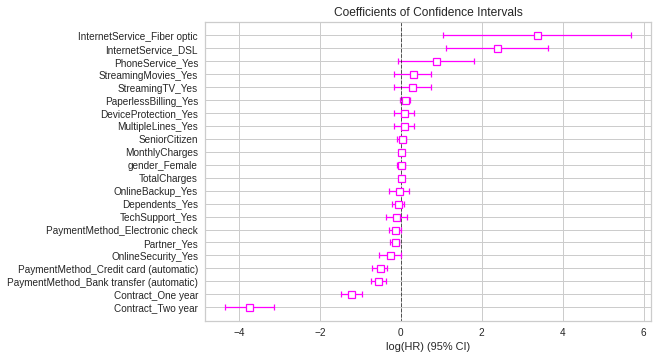

In [104]:
cph.plot(c= 'magenta')
plt.title('Coefficients of Confidence Intervals')

# So here we are looking at the different survival curves for customers whose TotalCharges are near zero compared to those 
# whose TotalCharges are closer to 4000.

Testing the proportional hazard assumptions
The proportional hazard assumption is that all customers have the same hazard function, but a unique scaling factor infront. So the shape of the hazard function is the same for all customers, and only a scalar infront changes.

            hi(t) = (ai)h(t)

At the core of the assumption is that ai is not time varying, that is, ai(t) = ai. Further more, if we take the ratio of this with the hazard,

            hi(t) / hj(t) = (ai)h(t) / (aj)h(t) = (ai) / (aj)
is constant for all t.


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5634 total observations, 4146 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Contract_One year                       km             62.45 <0.005     48.38
                                        rank           55.15 <0.005     43.03
Contract_Two year                       km             71.41 <0.005     54.93
                                        rank           56.72 <0.005     44.18
Dependents_Yes                          km              0.16   0.69      0.54
                                        rank            0.25   0.62      0.70
DeviceProtection_Yes                    km              1.07   0.30      1.73
                                        rank            2.72   0.10      3.34
InternetService_DSL                     km              8.99 <0.005      8.52
                                        rank           13.55 <0.005     12.07
InternetService_Fiber optic             km              5.09   0.02      5.38
                                        rank            8.57 <0.005      8.19
MonthlyCharges                          km              0.00   0.96      0.06
                                        rank            0.14   0.71      0.49
MultipleLines_Yes                       km              2.33   0.13      2.98
                                        rank            6.08   0.01      6.19
OnlineBackup_Yes                        km              2.49   0.11      3.12
                                        rank            4.89   0.03      5.21
OnlineSecurity_Yes                      km              0.82   0.37      1.45
                                        rank            2.84   0.09      3.44
PaperlessBilling_Yes                    km              1.31   0.25      1.99
                                        rank            1.26   0.26      1.93
Partner_Yes                             km              0.38   0.54      0.89
                                        rank            1.71   0.19      2.39
PaymentMethod_Bank transfer (automatic) km              0.06   0.80      0.32
                                        rank            1.76   0.19      2.43
PaymentMethod_Credit card (automatic)   km              2.03   0.15      2.70
                                        rank            5.11   0.02      5.40
PaymentMethod_Electronic check          km              0.70   0.40      1.31
                                        rank            1.79   0.18      2.46
PhoneService_Yes                        km              2.15   0.14      2.81
                                        rank            4.76   0.03      5.10
SeniorCitizen                           km              4.45   0.03      4.84
                                        rank            3.13   0.08      3.70
StreamingMovies_Yes                     km              1.69   0.19      2.37
                                        rank            3.78   0.05      4.27
StreamingTV_Yes                         km              1.98   0.16      2.65
                                        rank            4.10   0.04      4.54
TechSupport_Yes                         km              3.74   0.05      4.24
                                        rank            6.80   0.01      6.78
TotalCharges                            km             68.91 <0.005     53.11
                                        rank            8.09 <0.005      7.81
gender_Female                           km              0.70   0.40      1.32
                                        rank            0.49   0.48      1.05



1. Variable 'SeniorCitizen' failed the non-proportional test: p-value is 0.0349.

   Advice: with so few unique values (only 2), you can include `strata=['SeniorCitizen', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


2. Variable 'PhoneService_Yes' failed the non-proportional test: p-value is 0.0291.

   Advice: with so few unique values (only 2), you can include `strata=['PhoneService_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'MultipleLines_Yes' failed the non-proportional test: p-value is 0.0137.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.



/home/angshumanmandal/anaconda3/envs/pytom_env/lib/python3.8/site-packages/lifelines/fitters/mixins.py:119: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



   Bootstrapping lowess lines. May take a moment...


13. Variable 'TotalCharges' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'TotalCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'TotalCharges' using pd.cut, and then specify it in
`strata=['TotalCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.i

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0769)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0349)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.4840)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.4012)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.1911)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.5378)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.6152)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.6885)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0291)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1422)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0137)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1270)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0002)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0027)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0034)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0241)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p

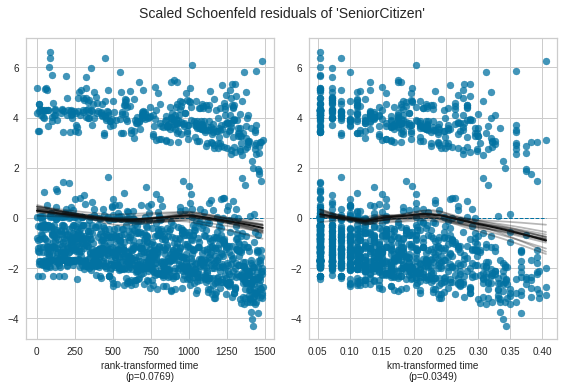

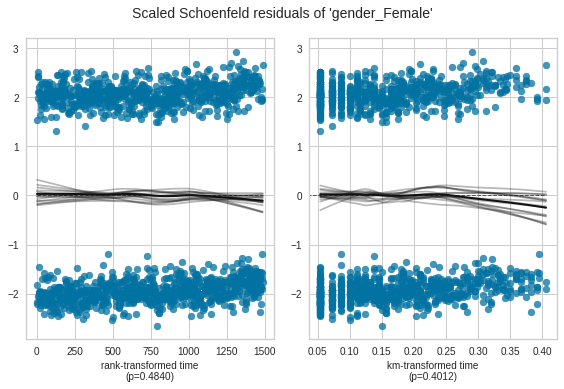

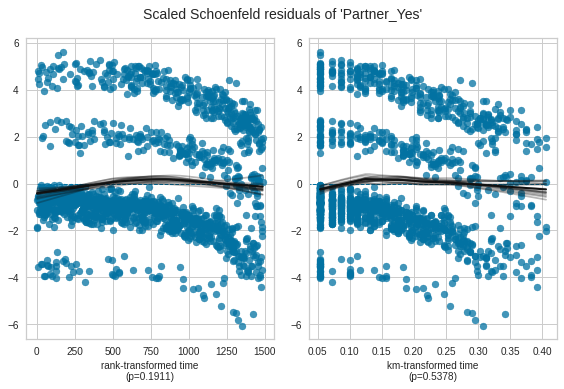

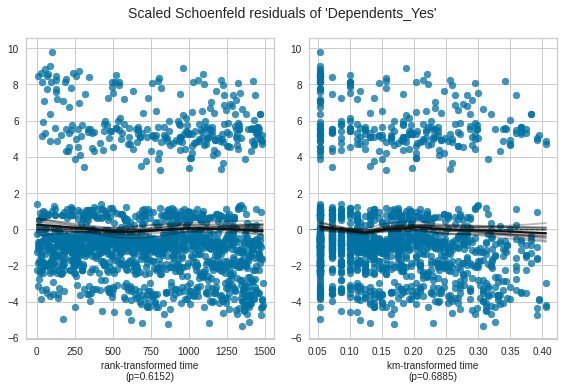

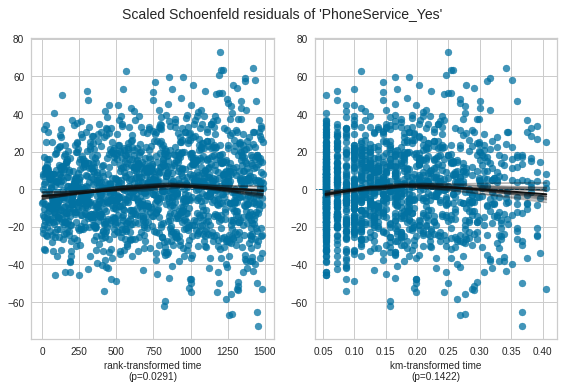

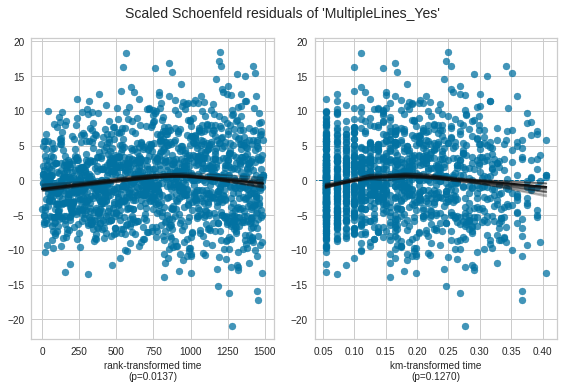

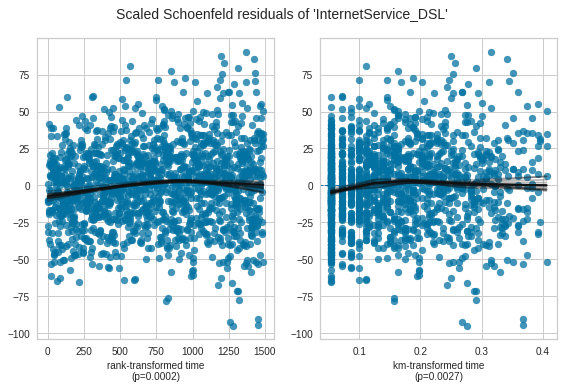

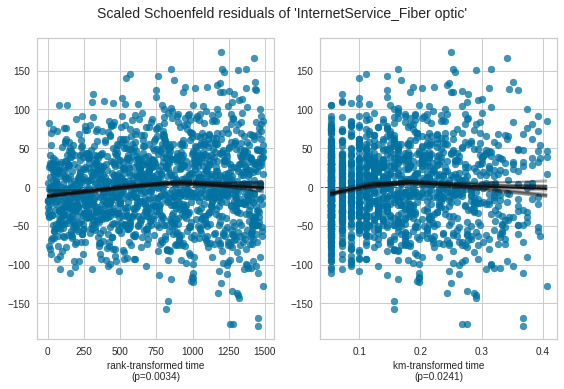

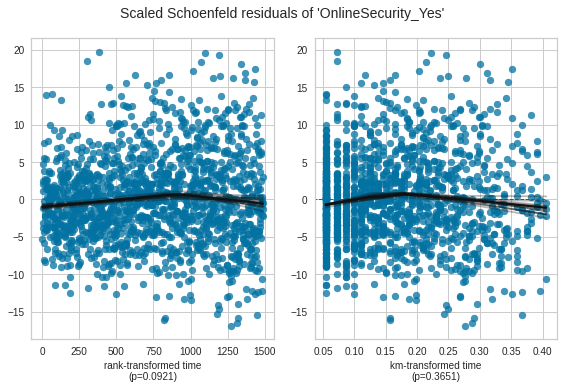

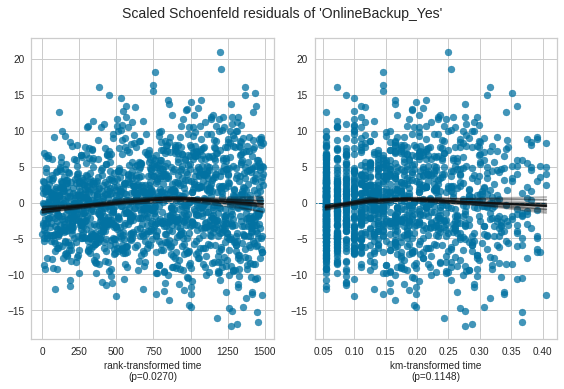

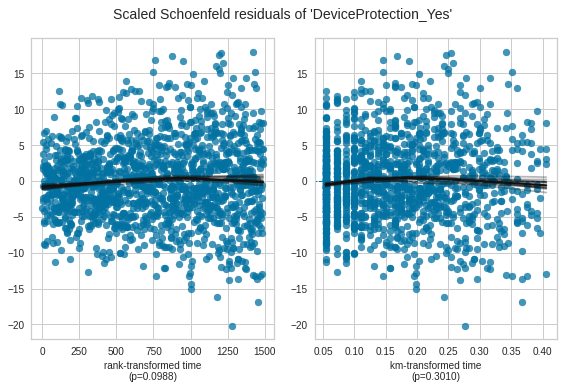

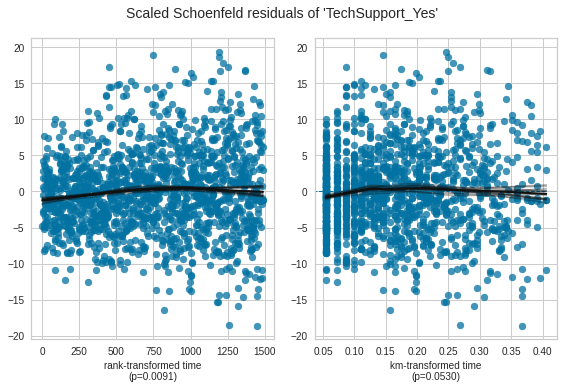

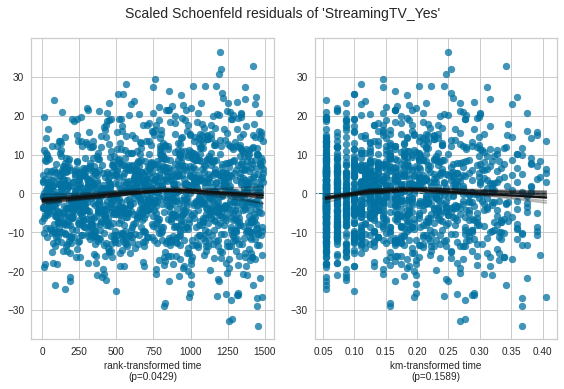

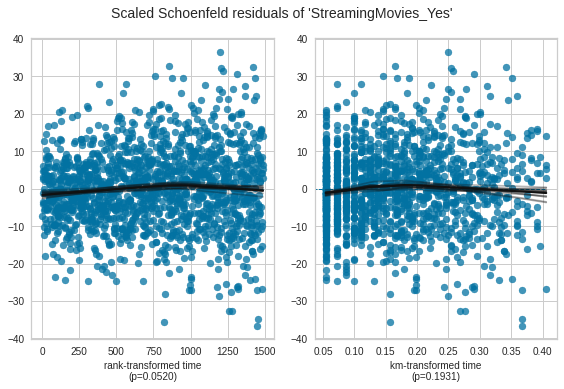

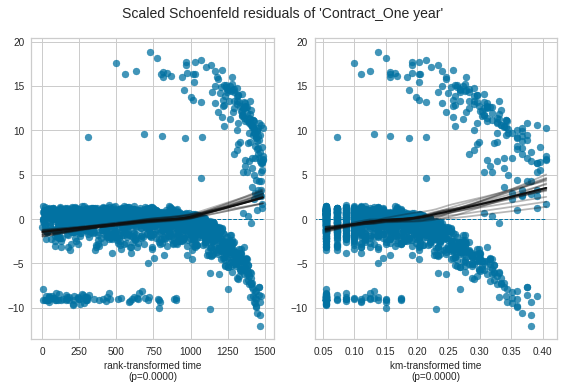

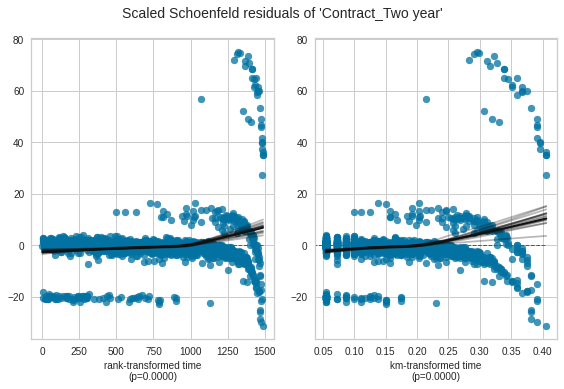

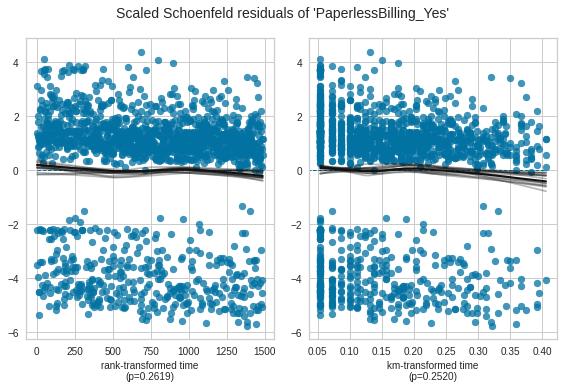

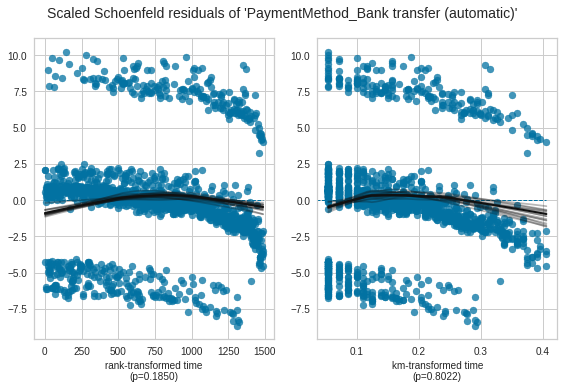

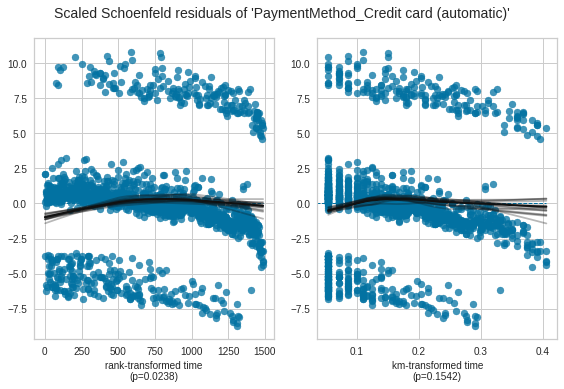

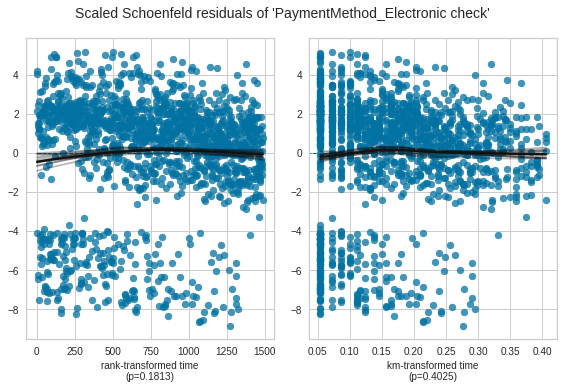

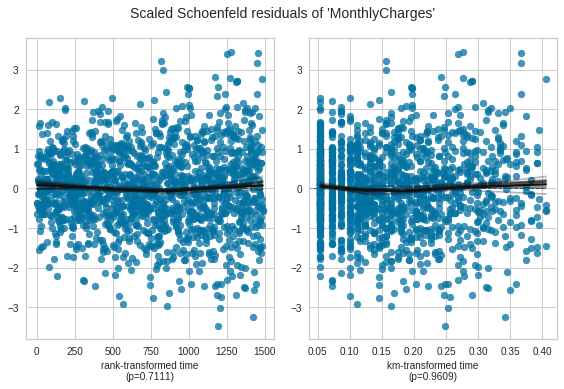

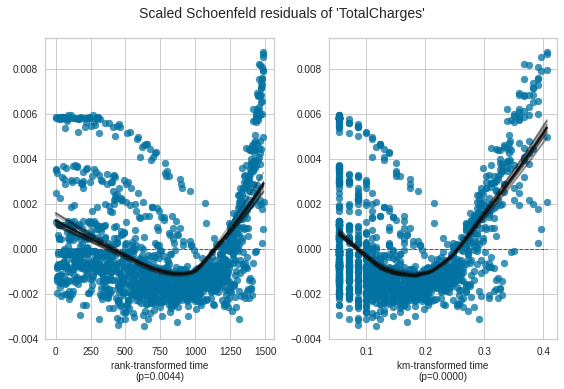

In [60]:
cph.check_assumptions(cph_train, p_value_threshold=0.05, show_plots=True)

Churn Prediction
Some usable information are available now to make decisions about how to reduce and prevent churn. Now focus on predictive analytics. Not much can be done for the ustomers who have already left, so selecting only the remaining customers from the dataset.

First step is to to calculate conditional probability.

Assuming T = event time for some Churn to happen, and S(t): = P(T > t) is the survival function.

We are interested to know What is the new survival function, given we know the customer was earlier in the list past time s.

P(T > t|T > s) = [P(T> t and T > s)] / P(T > s) = P(T > t) / P(T > s) =S(t) / S(s)

Thus scaling the original survival function by the survival function at time s (everything prior to s should be mapped to 1.0 as well, since the whole statistics id based on probabilities.

In [72]:
# from lifelines.datasets import load_regression_dataset

# df = load_regression_dataset()

# censored_subjects = a.loc[a['Churn_Yes'] == 0]
# unconditioned_sf = cph.predict_survival_function(censored_subjects)
# conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[a.loc[c.name, 'tenure']]).clip_upper(1))

In [75]:
from lifelines.datasets import load_regression_dataset

df = load_regression_dataset()

censored_subjects = a.loc[a['Churn_Yes'] == 0]
unconditioned_sf = cph.predict_survival_function(censored_subjects)
conditioned_sf = unconditioned_sf.apply(lambda c: (c / c.loc[a.loc[c.name, 'tenure']]).clip(upper=1))


Applied ‘unconditioned’ survival functions because some of these curves will predict churn before the customer’s current tenure time. Moreover, need to condition the predictions on the basis that the customers were still with with the company when the data was collected.

The individual customers can be investigated from survival curve and see how the conditioning has affected their survival over the baseline rate.



Text(0.5, 1.0, 'Survival Curve')

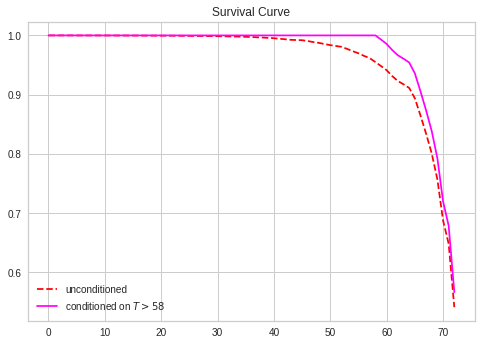

In [101]:
subject = 12
unconditioned_sf[subject].plot(ls="--", label="unconditioned", color= 'red')
conditioned_sf[subject].plot(label="conditioned on $T>58$", color= 'magenta')
plt.legend()
plt.title('Survival Curve')

The above plot shows that, customer 12 is still a customer after 58 months means his survival curve drops slower than the baseline for the customers similar but without that condition. There is around a 50% chance that a customer longer than 70 months (almost 6 years) will churn. Need to check if this is consistent with the business’ understanding of their customer life-cycle. If the customers are churning much earlier/later than the business perceives them to be, then the business may have to tweak the customer life-cycle management.

It also may be a good idea to intervene and incentive customers who have already stayed for 6 years. Since their probability of staying is dipping below 50%, then without intervention, they are more likely to churn than not to churn. However, these are business and strategy decesions to make.

Selecting a single customer as a prediction for how long the customer will last, which we can use to determine intervention value. Used the median to get a single row that has the number of months (tenure) where the customer has 50% likelihood of churning.

In [84]:
from lifelines.utils import median_survival_times, qth_survival_times

predictions_50 = median_survival_times(conditioned_sf)
# This is the same, but you can change the fraction to get other %tiles. 
# predictions_50 = qth_survival_times(.50, conditioned_sf)

In [85]:
# Using this single row and by joining it to our data DataFrame can investigate 
# the predicted remaining value a customer has for the business:

values = predictions_50.T.join(a[['MonthlyCharges','tenure']])
values['RemainingValue'] = values['MonthlyCharges'] * (values[0.5] - values['tenure'])

values.head()

0.5  MonthlyCharges  tenure  RemainingValue
0  23.0           29.85       1          656.70
1  48.0           56.95      34          797.30
3  61.0           42.30      45          676.80
6  31.0           89.10      22          801.90
7  29.0           29.75      10          565.25

The column named 0.5 is the single row we received from the median_survival_times call. It can be seen here that, by multiplying the MonthlyCharges by the difference between the customer’s current tenure and their median cancellation date, a visbility is available for which customers would inflict the most damage to the top line. This single row can be joined to the origial data to investigate the predicted remaining value a customer has for the business. Moreover, by multiplying the MonthlyCharges by the difference between the customer’s current tenure and their median cancellation date, business may have an idea for which customers would inflict the most damage to their top line.

Churn Prevention

A list of customers can be prepared now, who are the highest risk for churn. The goal would be to retain them.

Reviewing the coefficient chart again, the most significant features which impact survival positively are identified-

    - 2 year contract
    - 1 year contract
    - Credit Card payment
    - bank Transfer payment

Beyond these four the increases in survival become minimal and the results aren’t significant anyway. Stakeholders need to understand how much they can spend to keep customers is compare their survival rates with customer similar to them who instead have each of these four features present. Going to statistics again-

In [86]:
upgrades = ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Bank transfer (automatic)',
            'Contract_One year',
            'Contract_Two year']

results_dict = {}
for customer in values.index:
    actual = a.loc[[customer]]
    change = a.loc[[customer]]
    results_dict[customer] = [cph.predict_median(actual)]
    for upgrade in upgrades: 
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0
        results_dict[customer].append(cph.predict_median(change))
        change[upgrade] = 1 if list(change[upgrade]) == [0] else 0

results_df = pd.DataFrame(results_dict).T
results_df.columns = ['baseline'] + upgrades
actions = values.join(results_df).drop([0.5], axis=1)

In [87]:
actions.head()

MonthlyCharges  tenure  RemainingValue  baseline  \
0           29.85       1          656.70      22.0   
1           56.95      34          797.30      47.0   
3           42.30      45          676.80      60.0   
6           89.10      22          801.90      25.0   
7           29.75      10          565.25      27.0   

   PaymentMethod_Credit card (automatic)  \
0                                   27.0   
1                                   51.0   
3                                   64.0   
6                                   21.0   
7                                   32.0   

   PaymentMethod_Bank transfer (automatic)  Contract_One year  \
0                                     28.0               33.0   
1                                     52.0               37.0   
3                                     56.0               50.0   
6                                     31.0               36.0   
7                                     32.0               37.0   

   Contract_Two year  
0               54.0  
1               72.0  
3                inf  
6               56.0  
7               57.0

#### It can be seen from this that if telecom company can manage to get the first customer to use a Credit Card payments that could increase the survival time by 3 months (26– 23 baseline) and so on. This input helps to take necessary strategy to retain customers.
### To understand the financial impact-

In [88]:
actions['CreditCard Diff'] = (
    actions['PaymentMethod_Credit card (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['BankTransfer Diff'] = (
    actions['PaymentMethod_Bank transfer (automatic)'] - actions['baseline']) * actions['MonthlyCharges']

actions['1yrContract Diff'] = (
    actions['Contract_One year'] - actions['baseline']) * actions['MonthlyCharges']

actions['2yrContract Diff'] = (
    actions['Contract_Two year'] - actions['baseline']) * actions['MonthlyCharges']

actions.head()

MonthlyCharges  tenure  RemainingValue  baseline  \
0           29.85       1          656.70      22.0   
1           56.95      34          797.30      47.0   
3           42.30      45          676.80      60.0   
6           89.10      22          801.90      25.0   
7           29.75      10          565.25      27.0   

   PaymentMethod_Credit card (automatic)  \
0                                   27.0   
1                                   51.0   
3                                   64.0   
6                                   21.0   
7                                   32.0   

   PaymentMethod_Bank transfer (automatic)  Contract_One year  \
0                                     28.0               33.0   
1                                     52.0               37.0   
3                                     56.0               50.0   
6                                     31.0               36.0   
7                                     32.0               37.0   

   Contract_Two year  CreditCard Diff  BankTransfer Diff  1yrContract Diff  \
0               54.0           149.25             179.10            328.35   
1               72.0           227.80             284.75           -569.50   
3                inf           169.20            -169.20           -423.00   
6               56.0          -356.40             534.60            980.10   
7               57.0           148.75             148.75            297.50   

   2yrContract Diff  
0            955.20  
1           1423.75  
3               inf  
6           2762.10  
7            892.50

Here, the moving the customer in the first row to paying by Credit Card could be worth up to dollar 119.40. That’ is a valuable information for business to check.
#### Accuracy and Calibration
Though model displayed 92.9% concordance, but considering probabilistic view of events like Churn it is necessary to check for calibration than accuracy.

/home/angshumanmandal/anaconda3/envs/pytom_env/lib/python3.8/site-packages/sklearn/calibration.py:1000: FutureWarning: The normalize argument is deprecated in v1.1 and will be removed in v1.3. Explicitly normalizing y_prob will reproduce this behavior, but it is recommended that a proper probability is used (i.e. a classifier's `predict_proba` positive class or `decision_function` output calibrated with `CalibratedClassifierCV`).
  warnings.warn(


Text(0.5, 1.0, 'Calibration plot for Churn prediction')

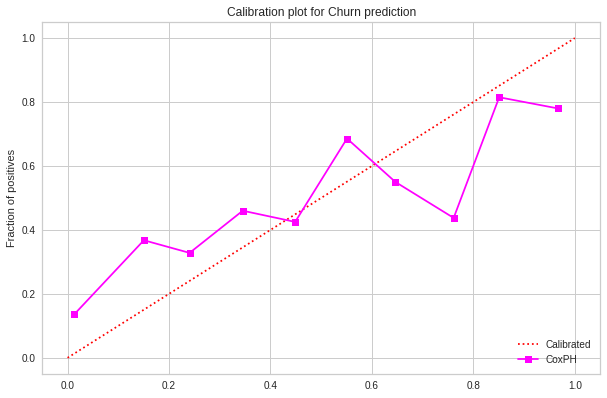

In [97]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

ax1.plot([0, 1], [0, 1], "k:", label="Calibrated", color= 'red')

probs = 1 - np.array(cph.predict_survival_function(cph_test).loc[13])
actual = cph_test['Churn_Yes']

fraction_of_positives, mean_predicted_value = \
calibration_curve(actual, probs, n_bins=10, normalize=False)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
        label="%s" % ("CoxPH",),color= 'magenta')


ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot for Churn prediction')

Running the example creates a reliability diagram showing the calibration of the predicted probabilities (solid line) compared to a perfectly calibrated model along the diagonal of the plot (dashed line.). The CoxPh line is closer to the diagonal line representing good calibration. However, the model seems to underpredict risk at the low end (less than 90% chance of churn) and slightly overpredict risk at the high end (moe than 50% chance of churn).

In [91]:
from sklearn.metrics import brier_score_loss
brier_score_loss(
    cph_test['Churn_Yes'], 1 - np.array(cph.predict_survival_function(cph_test).loc[13]), pos_label=1
    )

0.1662064961159279

Indexing at tenure is set at 13 because the model works over a range of time periods, so, have to inspect the calibration at each step in order to get a feel for accuracy.


           0
1   0.218235
2   0.204745
3   0.195006
4   0.186923
5   0.181515
..       ...
68  0.441433
69  0.452273
70  0.466521
71  0.473730
72  0.491085

[72 rows x 1 columns]


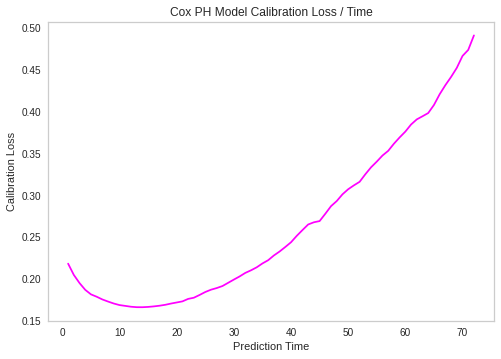

In [99]:
from sklearn.metrics import brier_score_loss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loss_dict = {}
for i in range(1, 73):
    predicted_probs = 1 - np.array(cph.predict_survival_function(cph_test).loc[i])
    true_labels = cph_test['Churn_Yes']
    score = brier_score_loss(true_labels, predicted_probs, pos_label=1)
    loss_dict[i] = [score]

loss_df = pd.DataFrame(loss_dict).T
print(loss_df)

fig, ax = plt.subplots()
ax.plot(loss_df.index, loss_df[0],color= 'magenta')  # Access the first column of the DataFrame, which contains the loss values

ax.set(xlabel='Prediction Time', ylabel='Calibration Loss',
       title='Cox PH Model Calibration Loss / Time')
ax.grid()
plt.show()


The model is well calibrated between 5 and 25 months

In [95]:
loss_df.columns = ['loss']
temp_df = actions.reset_index().set_index('PaymentMethod_Credit card (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['CreditCard Lower'] = temp_df['CreditCard Diff'] - (temp_df['loss'] * temp_df['CreditCard Diff'])
actions['CreditCard Upper'] = temp_df['CreditCard Diff'] + (temp_df['loss'] * temp_df['CreditCard Diff'])

temp_df = actions.reset_index().set_index('PaymentMethod_Bank transfer (automatic)').join(loss_df)
temp_df = temp_df.set_index('index')
actions['BankTransfer Lower'] = temp_df['BankTransfer Diff'] - (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
actions['BankTransfer Upper'] = temp_df['BankTransfer Diff'] + (.5 * temp_df['loss'] * temp_df['BankTransfer Diff'])
temp_df = actions.reset_index().set_index('Contract_One year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['1yrContract Lower'] = temp_df['1yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
actions['1yrContract Upper'] = temp_df['1yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['1yrContract Diff'])
temp_df = actions.reset_index().set_index('Contract_Two year').join(loss_df)
temp_df = temp_df.set_index('index')
actions['2yrContract Lower'] = temp_df['2yrContract Diff'] - (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])
actions['2yrContract Upper'] = temp_df['2yrContract Diff'] + (.5 * temp_df['loss'] * temp_df['2yrContract Diff'])

In [96]:

temp_df.head()

MonthlyCharges  tenure  RemainingValue  baseline  \
index                                                     
936             80.85       0         3072.30      38.0   
6670            73.35       0         2860.65      39.0   
5602            80.25       6         2889.00      42.0   
6818            71.10       3         2844.00      43.0   
3412            59.50       2         2737.00      48.0   

       PaymentMethod_Credit card (automatic)  \
index                                          
936                                     41.0   
6670                                    43.0   
5602                                    47.0   
6818                                    48.0   
3412                                    53.0   

       PaymentMethod_Bank transfer (automatic)  Contract_One year  \
index                                                               
936                                       42.0               48.0   
6670                                      43.0               49.0   
5602                                      47.0               52.0   
6818                                      48.0               54.0   
3412                                      53.0               58.0   

       CreditCard Diff  BankTransfer Diff  1yrContract Diff  2yrContract Diff  \
index                                                                           
936             242.55             323.40             808.5           -2587.2   
6670            293.40             293.40             733.5           -2347.2   
5602            401.25             401.25             802.5           -2568.0   
6818            355.50             355.50             782.1           -2204.1   
3412            297.50             297.50             595.0           -1904.0   

       CreditCard Lower  CreditCard Upper  BankTransfer Lower  \
index                                                           
936          181.553477        303.546523          281.621122   
6670         215.625891        371.174109          254.512945   
5602         286.092432        516.407568          343.671216   
6818         251.298141        459.701859          303.399071   
3412         200.779431        394.220569          249.139715   

       BankTransfer Upper  1yrContract Lower  1yrContract Upper      loss  
index                                                                      
936            365.178878         690.008857         926.991143  0.178699  
6670           332.287055         623.061821         843.938179  0.175424  
5602           458.828784         675.671743         929.328257  0.168720  
6818           407.600929         651.713601         912.486399  0.166754  
3412           345.860285         487.419201         702.580799  0.167153

For each time period telecom company wants to predict that a specific upgrade will produce and create a lower and upper bound around the estimated return on investment.